In [ ]:
#SEGEMENTING CONSUMERS OF BATH SOAPS USING K-MEANS CLUSTERING

#CRISA is an Asian market research agency that specializes in tracking consumer purchase behavior in consumer goods 
#(both durable and nondurable). In one major research project, CRISA tracks numerous consumer product categories 
#(e.g., “detergents”), and, within each category, perhaps dozens of brands. To track purchase behavior,
#CRISA constituted household panels in over 100 cities and towns in India, covering most of the Indian urban market. 
#The households were carefully selected using stratified sampling to ensure a representative sample; a subset of 600 records 
#is analyzed here. The strata were defined on the basis of socioeconomic status and the market (a collection of cities).
#CRISA has both transaction data (each row is a transaction) and household data (each row is a household), and 
#for the household data it maintains the following information:
#Demographics of the households (updated annually)
#Possession of durable goods (car, washing machine, etc., updated annually; an “affluence index” is computed from this information)
#Purchase data of product categories and brands (updated monthly) CRISA has two categories of clients: (1) advertising agencies that
#subscribe to the database services, obtain updated data every month, and use the data to advise their clients on advertising and promotion
#strategies; (2) consumer goods manufacturers, which monitor their market share using the CRISA database.

#Key Problems-CRISA has traditionally segmented markets on the basis of purchaser demographics. They would now like to 
#segment the market based on two key sets of variables more directly related to the purchase process and to brand loyalty:
#1. Purchase behavior (volume, frequency, susceptibility to discounts, and brand loyalty)
#2. Basis of purchase (price, selling proposition) Doing so would allow CRISA to gain information about what demographic attributes are associated with different purchase
#behaviors and degrees of brand loyalty, and thus deploy promotion budgets more effectively. More effective market segmentation would
#enable CRISA’s clients (in this case, a firm called IMRB) to design more cost-effective promotions targeted at appropriate segments.
#Thus, multiple promotions could be launched, each targeted at different market segments at different times of the year. This would
#result in a more cost-effective allocation of the promotion budget to different market segments. It would also enable IMRB to design more
#effective customer reward systems and thereby increase brand loyalty.

#Measuring Brand Loyalty-Several variables in this case measure aspects of brand loyalty. The number of different brands purchased by the customer is one measure
#of loyalty. However, a consumer who purchases one or two brands in quick succession, then settles on a third for a long streak, is different
#from a consumer who constantly switches back and forth among three brands. Therefore, how often customers switch from one brand to
#another is another measure of loyalty. Yet a third perspective on the same issue is the proportion of purchases that go to different brands—
#a consumer who spends 90% of his or her purchase money on one brand is more loyal than a consumer who spends more equally among
#several brands. All three of these components can be measured with the data in the purchase summary worksheet.

#Assignment- 1. Use k-means clustering to identify clusters of households based on:
#a. The variables that describe purchase behavior (including brand loyalty) b. The variables that describe the basis for purchase
#c. The variables that describe both purchase behavior and basis of purchase

In [12]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [2]:
soap_df = pd.read_csv('BathSoapHousehold.csv')
soap_df.columns

Index(['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
       'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
       'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5',
       'Others 999', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
       'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
       'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14',
       'PropCat 15'],
      dtype='object')

In [3]:
#Formatting the variables
soap_df.columns = [s.strip().replace(' ', '_') for s in soap_df.columns]
soap_df.columns

Index(['Member_id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence_Index', 'No._of_Brands', 'Brand_Runs', 'Total_Volume',
       'No._of__Trans', 'Value', 'Trans_/_Brand_Runs', 'Vol/Tran',
       'Avg._Price', 'Pur_Vol_No_Promo_-_%', 'Pur_Vol_Promo_6_%',
       'Pur_Vol_Other_Promo_%', 'Br._Cd._57,_144', 'Br._Cd._55', 'Br._Cd._272',
       'Br._Cd._286', 'Br._Cd._24', 'Br._Cd._481', 'Br._Cd._352', 'Br._Cd._5',
       'Others_999', 'Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15'],
      dtype='object')

In [4]:
#Descriptive statistics for all the variables.
soap_df.describe()

,Member_id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
count,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1.104188e+06,2.500000,2.048333,8.178333,1.738333,3.213333,4.043333,4.191667,3.233333,0.931667,...,0.092324,0.096909,0.080148,0.030806,0.020248,0.029367,0.006217,0.024938,0.136481,0.025398
std,4.560152e+04,1.118967,1.134964,4.294641,0.648510,0.865489,2.190004,2.300090,1.217110,0.507372,...,0.166330,0.195760,0.152564,0.062816,0.076657,0.098467,0.026312,0.095448,0.266045,0.087592
min,1.010010e+06,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.065295e+06,1.750000,1.000000,4.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.106235e+06,2.500000,3.000000,10.000000,2.000000,3.000000,4.500000,4.000000,4.000000,1.000000,...,0.020155,0.012601,0.007750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.148292e+06,3.250000,3.000000,10.000000,2.000000,4.000000,5.000000,5.000000,4.000000,1.000000,...,0.103679,0.082935,0.086341,0.031645,0.000000,0.007739,0.000000,0.005522,0.118416,0.000000
max,1.167670e+06,4.000000,3.000000,19.000000,2.000000,4.000000,9.000000,15.000000,5.000000,2.000000,...,0.971098,1.000000,0.963636,0.407643,1.000000,0.897507,0.333333,1.000000,1.000000,0.840194


In [5]:
#Step-1 for purchase behaviour
#creating a new dataframe including only variables belongs to purchase behaviour like (volume, frequency, susceptibility to discounts,and brand loyalty)
#using member_id for indexing.
soap_df2=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran','Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%','Pur_Vol_Other_Promo_%']]
soap_df2

,Member_id,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%
0,1010010,3,17,24,1.41,334.38,8025,818.00,10.19,1.000000,0.000000,0.000000
1,1010020,5,25,40,1.60,349.38,13975,1681.50,12.03,0.887299,0.096601,0.016100
2,1014020,5,37,63,1.70,366.67,23100,1950.00,8.44,0.941558,0.019481,0.038961
3,1014030,2,4,4,1.00,375.00,1500,114.00,7.60,1.000000,0.000000,0.000000
4,1014190,3,6,13,2.17,638.46,8300,591.00,7.12,0.614458,0.144578,0.240964
...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,3,5,22,4.40,410.23,9025,1218.00,13.50,0.775623,0.224377,0.000000
596,1167230,5,23,28,1.22,180.36,5050,851.00,16.85,0.925743,0.074257,0.000000
597,1167340,4,19,25,1.32,1164.00,29100,3302.75,11.35,1.000000,0.000000,0.000000
598,1167350,3,15,19,1.27,289.47,5500,460.00,8.36,0.759091,0.186364,0.054545


In [6]:
#Converting the Member_id to object from int.
soap_df2['Member_id']=soap_df2['Member_id'].astype(str)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df2=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran','Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%','Pur_Vol_Other_Promo_%']]
soap_df2['Member_id']=soap_df2['Member_id'].astype(str)

#Clustering with K-means with 2 clusters
soap_df2.set_index('Member_id', inplace=True)
soap_df2 = soap_df2.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df2_norm = soap_df2.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=2, random_state=0).fit(soap_df2_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df2_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0 :  1010010, 1014030, 1014190, 1017110, 1017160, 1017460, 1020210, 1024050, 1024100, 1024400, 1024630, 1025140, 1025210, 1027040, 1027160, 1027210, 1027480, 1027540, 1027580, 1027680, 1027720, 1027750, 1027810, 1027840, 1028020, 1028110, 1028230, 1030040, 1030150, 1030200, 1030280, 1030300, 1034020, 1034130, 1034220, 1034350, 1035020, 1035100, 1037050, 1037120, 1037190, 1037250, 1037690, 1037720, 1037940, 1038000, 1038110, 1040190, 1040250, 1040340, 1044010, 1044140, 1044370, 1045030, 1045060, 1045100, 1047210, 1047220, 1047420, 1047610, 1047650, 1047760, 1047980, 1050050, 1054270, 1054310, 1055260, 1057150, 1057280, 1057410, 1057500, 1057510, 1057580, 1058000, 1058350, 1058370, 1060050, 1060330, 1060650, 1060980, 1061080, 1061380, 1061500, 1061660, 1061820, 1061830, 1061940, 1062120, 1062220, 1062310, 1065040, 1065080, 1065160, 1065340, 1065370, 1065450, 1065510, 1065710, 1065780, 1070140, 1070310, 1070500, 1070660, 1070880, 1070980, 1071120, 1071340, 1071460, 1071500, 1071560, 10716

In [8]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df2_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   No._of_Brands  Brand_Runs  No._of__Trans  Trans_/_Brand_Runs  Vol/Tran  \
0         -0.555      -0.616         -0.553               0.208     0.131   
1          0.701       0.778          0.699              -0.263    -0.166   

   Total_Volume  Value  Avg._Price  Pur_Vol_No_Promo_-_%  Pur_Vol_Promo_6_%  \
0        -0.313 -0.421      -0.162                 0.273             -0.314   
1         0.396  0.532       0.204                -0.345              0.397   

   Pur_Vol_Other_Promo_%  
0                 -0.046  
1                  0.059  


In [9]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df2_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df2_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (335 members): 2787.97 within cluster 
Cluster 1 (265 members): 2651.60 within cluster 


,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,cluster
0,-0.554661,-0.615764,-0.553269,0.207919,0.131326,-0.313252,-0.420707,-0.161714,0.272542,-0.314359,-0.046322,Cluster 0
1,0.701175,0.778419,0.699416,-0.262841,-0.166016,0.395997,0.531837,0.204431,-0.344535,0.397397,0.058559,Cluster 1


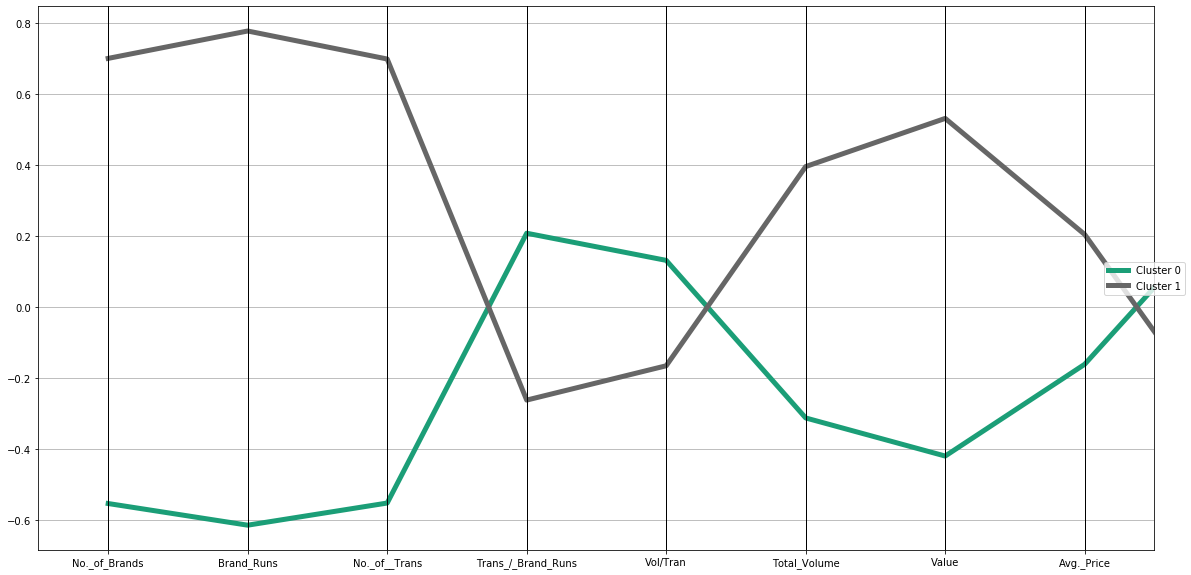

In [13]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(20,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

In [14]:
soap_df2_norm.groupby(kmeans.labels_).mean()

,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%
0,-0.554661,-0.615764,-0.553269,0.207919,0.131326,-0.313252,-0.420707,-0.161714,0.272542,-0.314359,-0.046322
1,0.701175,0.778419,0.699416,-0.262841,-0.166016,0.395997,0.531837,0.204431,-0.344535,0.397397,0.058559


In [15]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1
0,0.000000,2.800524
1,2.800524,0.000000


In [16]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    2.800524
1    2.800524
dtype: float64

In [17]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df2=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran','Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%','Pur_Vol_Other_Promo_%']]
soap_df2['Member_id']=soap_df2['Member_id'].astype(str)

#Clustering with K-means with 3 clusters
soap_df2.set_index('Member_id', inplace=True)
soap_df2 = soap_df2.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df2_norm = soap_df2.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=3, random_state=0).fit(soap_df2_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df2_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0 :  1010020, 1014020, 1017020, 1017360, 1017490, 1020070, 1024120, 1024220, 1027390, 1035150, 1037220, 1037290, 1037420, 1037630, 1037850, 1037890, 1038080, 1040080, 1040150, 1040370, 1045120, 1047350, 1047750, 1047870, 1050210, 1054110, 1055060, 1055160, 1055330, 1057510, 1057800, 1057930, 1058010, 1060230, 1060260, 1060370, 1060420, 1060640, 1060720, 1060760, 1060810, 1060920, 1061130, 1061180, 1061310, 1061730, 1062270, 1065100, 1065600, 1065650, 1070040, 1070270, 1070300, 1070310, 1070330, 1070420, 1070600, 1070670, 1071010, 1071640, 1071780, 1071840, 1075060, 1075130, 1075200, 1075350, 1075520, 1075630, 1075730, 1077390, 1080080, 1080220, 1080390, 1080750, 1080950, 1081530, 1081850, 1082210, 1085230, 1085290, 1085480, 1095150, 1097180, 1097410, 1097450, 1100100, 1100120, 1100290, 1100510, 1100620, 1100790, 1101080, 1104070, 1104490, 1104740, 1105040, 1105250, 1105370, 1106020, 1106040, 1106090, 1106180, 1106550, 1106730, 1110380, 1110540, 1110550, 1110680, 1111010, 1111180, 11113

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df2_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   No._of_Brands  Brand_Runs  No._of__Trans  Trans_/_Brand_Runs  Vol/Tran  \
0          0.739       0.790          0.876              -0.197     0.136   
1         -0.472      -0.580         -0.528               0.209     0.048   
2          0.065       0.328         -0.029              -0.301    -0.448   

   Total_Volume  Value  Avg._Price  Pur_Vol_No_Promo_-_%  Pur_Vol_Promo_6_%  \
0         0.794  0.888       0.081                 0.153             -0.166   
1        -0.357 -0.449      -0.128                 0.435             -0.382   
2        -0.444 -0.324       0.269                -1.810              1.657   

   Pur_Vol_Other_Promo_%  
0                 -0.040  
1                 -0.227  
2                  0.863  


In [19]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df2_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df2_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (193 members): 1657.10 within cluster 
Cluster 1 (315 members): 1977.93 within cluster 
Cluster 2 (92 members): 1091.35 within cluster 


,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,cluster
0,0.739006,0.790049,0.875843,-0.196964,0.135824,0.793931,0.887976,0.081095,0.153217,-0.165669,-0.040322,Cluster 0
1,-0.471748,-0.579976,-0.528221,0.208734,0.047714,-0.356864,-0.449436,-0.128293,0.434675,-0.382487,-0.227445,Cluster 1
2,0.064917,0.328402,-0.028781,-0.301490,-0.448303,-0.443656,-0.323990,0.269140,-1.809712,1.657148,0.863339,Cluster 2


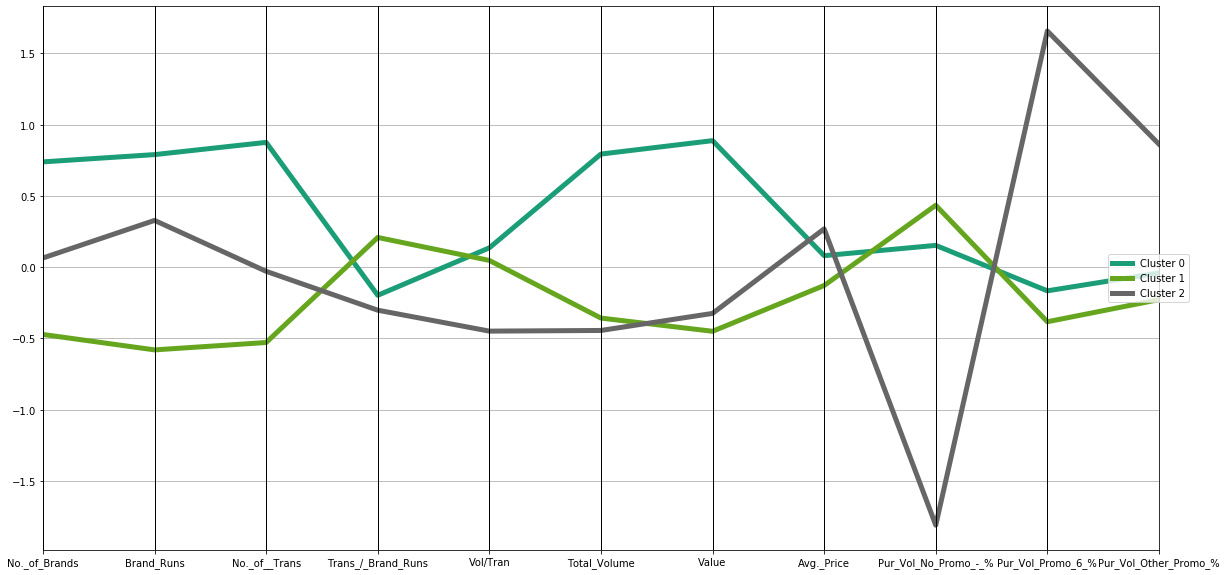

In [20]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(20,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
#plt.xlim(-0.5,5.3)
centroids

In [21]:
soap_df2_norm.groupby(kmeans.labels_).mean()

,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%
0,0.739006,0.790049,0.875843,-0.196964,0.135824,0.793931,0.887976,0.081095,0.153217,-0.165669,-0.040322
1,-0.471748,-0.579976,-0.528221,0.208734,0.047714,-0.356864,-0.449436,-0.128293,0.434675,-0.382487,-0.227445
2,0.064917,0.328402,-0.028781,-0.301490,-0.448303,-0.443656,-0.323990,0.269140,-1.809712,1.657148,0.863339


In [22]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2
0,0.000000,2.967277,3.586947
1,2.967277,0.000000,3.526667
2,3.586947,3.526667,0.000000


In [23]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    6.554224
1    6.493944
2    7.113614
dtype: float64

In [24]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df2=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran','Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%','Pur_Vol_Other_Promo_%']]
soap_df2['Member_id']=soap_df2['Member_id'].astype(str)

#Clustering with K-means with 4 clusters
soap_df2.set_index('Member_id', inplace=True)
soap_df2 = soap_df2.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df2_norm = soap_df2.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=4, random_state=0).fit(soap_df2_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df2_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0 :  1010020, 1014020, 1017020, 1017490, 1020070, 1024120, 1024220, 1027390, 1028050, 1035150, 1037220, 1037630, 1037850, 1037890, 1038080, 1040080, 1040150, 1040370, 1047350, 1047750, 1050210, 1055060, 1055160, 1055330, 1057800, 1057930, 1058010, 1060230, 1060260, 1060370, 1060420, 1060640, 1060720, 1061130, 1061180, 1061310, 1061700, 1061730, 1062270, 1065100, 1065600, 1065650, 1065660, 1070300, 1070330, 1070600, 1070670, 1071010, 1071090, 1071780, 1071840, 1075130, 1075350, 1075520, 1075610, 1075630, 1075690, 1075730, 1080220, 1080330, 1080750, 1081530, 1081850, 1082210, 1085230, 1085290, 1085480, 1095150, 1097180, 1097450, 1100100, 1100120, 1100290, 1100510, 1101080, 1104070, 1104630, 1105250, 1105370, 1105400, 1106020, 1106040, 1106090, 1106180, 1106550, 1106730, 1110380, 1110540, 1110680, 1111010, 1111410, 1111750, 1115200, 1115330, 1116050, 1116130, 1116630, 1120440, 1120870, 1120960, 1121050, 1121170, 1121270, 1121350, 1121570, 1121760, 1125140, 1135050, 1135150, 1137070, 11375

In [25]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df2_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   No._of_Brands  Brand_Runs  No._of__Trans  Trans_/_Brand_Runs  Vol/Tran  \
0          0.956       0.974          0.962              -0.242    -0.390   
1         -0.108       0.197         -0.128              -0.280    -0.387   
2         -0.462      -0.544         -0.563              -0.018    -0.126   
3         -0.495      -0.534         -0.084               0.998     1.930   

   Total_Volume  Value  Avg._Price  Pur_Vol_No_Promo_-_%  Pur_Vol_Promo_6_%  \
0         0.340  0.523       0.215                 0.057             -0.066   
1        -0.461 -0.366       0.214                -2.069              1.891   
2        -0.509 -0.507      -0.005                 0.420             -0.363   
3         1.665  1.083      -0.765                 0.343             -0.362   

   Pur_Vol_Other_Promo_%  
0                 -0.009  
1                  0.993  
2                 -0.229  
3                 -0.101  


In [26]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df2_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df2_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (179 members): 1099.90 within cluster 
Cluster 1 (73 members): 946.38 within cluster 
Cluster 2 (279 members): 1277.14 within cluster 
Cluster 3 (69 members): 791.75 within cluster 


,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,cluster
0,0.955773,0.974203,0.961716,-0.242446,-0.390066,0.339800,0.522776,0.214966,0.056775,-0.066051,-0.008919,Cluster 0
1,-0.108283,0.196659,-0.128385,-0.279647,-0.386832,-0.461450,-0.365796,0.213874,-2.069475,1.890781,0.992728,Cluster 1
2,-0.462405,-0.544378,-0.562720,-0.018140,-0.125900,-0.508943,-0.507436,-0.004693,0.420330,-0.362851,-0.228997,Cluster 2
3,-0.495184,-0.534161,-0.083714,0.998160,1.930244,1.664590,1.082621,-0.764963,0.342564,-0.361860,-0.101194,Cluster 3


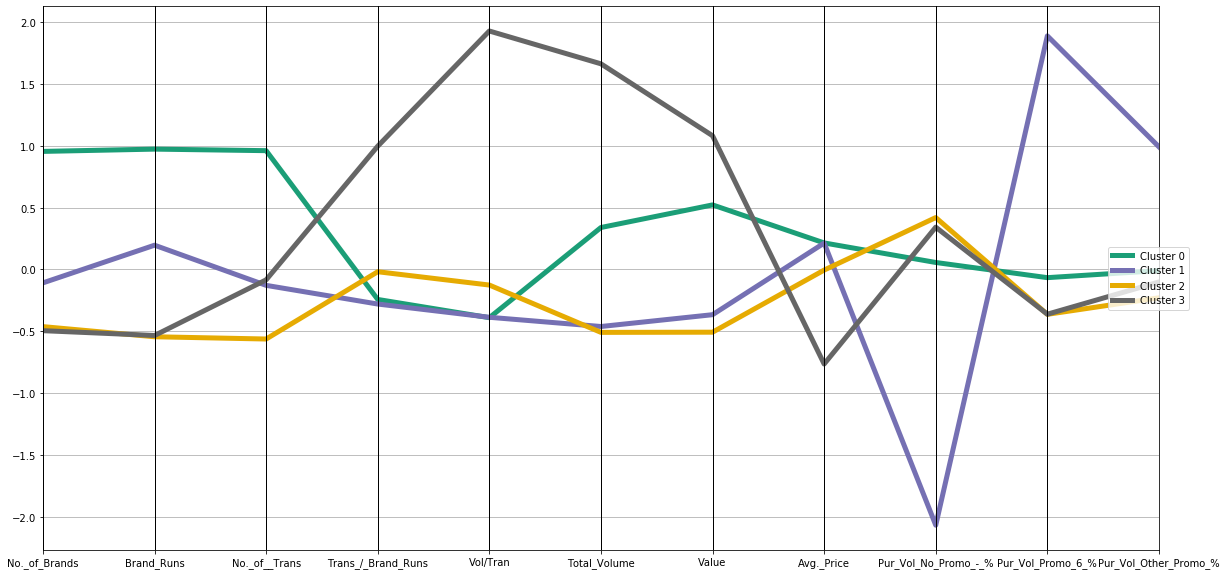

In [27]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(20,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
#plt.xlim(-0.5,5.3)
centroids

In [28]:
soap_df2_norm.groupby(kmeans.labels_).mean()

,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%
0,0.955773,0.974203,0.961716,-0.242446,-0.390066,0.339800,0.522776,0.214966,0.056775,-0.066051,-0.008919
1,-0.108283,0.196659,-0.128385,-0.279647,-0.386832,-0.461450,-0.365796,0.213874,-2.069475,1.890781,0.992728
2,-0.462405,-0.544378,-0.562720,-0.018140,-0.125900,-0.508943,-0.507436,-0.004693,0.420330,-0.362851,-0.228997
3,-0.495184,-0.534161,-0.083714,0.998160,1.930244,1.664590,1.082621,-0.764963,0.342564,-0.361860,-0.101194


In [29]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2,3
0,0.000000,3.702904,2.976570,3.950032
1,3.702904,0.000000,3.720261,5.229960
2,2.976570,3.720261,0.000000,3.652964
3,3.950032,5.229960,3.652964,0.000000


In [30]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    10.629506
1    12.653125
2    10.349795
3    12.832956
dtype: float64

In [31]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df2=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran','Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%','Pur_Vol_Other_Promo_%']]
soap_df2['Member_id']=soap_df2['Member_id'].astype(str)

#Clustering with K-means with 5 clusters
soap_df2.set_index('Member_id', inplace=True)
soap_df2 = soap_df2.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df2_norm = soap_df2.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=5, random_state=0).fit(soap_df2_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df2_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0 :  1010020, 1014020, 1017020, 1017490, 1020070, 1024120, 1024220, 1027390, 1028050, 1035150, 1037630, 1037850, 1037890, 1038080, 1040080, 1040150, 1040370, 1047350, 1047750, 1050210, 1055060, 1055160, 1055330, 1057800, 1057930, 1058010, 1060230, 1060260, 1060370, 1060420, 1060640, 1061130, 1061180, 1061310, 1061700, 1061730, 1062270, 1065100, 1065600, 1065650, 1065660, 1070300, 1070330, 1070600, 1070670, 1071090, 1071780, 1071840, 1075130, 1075350, 1075520, 1075610, 1075630, 1075690, 1075730, 1080220, 1080330, 1080750, 1081530, 1082210, 1085230, 1085290, 1085480, 1095130, 1095150, 1097180, 1097450, 1100100, 1100120, 1100290, 1100510, 1100910, 1101080, 1104070, 1104630, 1105040, 1105130, 1105250, 1105370, 1105400, 1106020, 1106040, 1106090, 1106180, 1106550, 1106730, 1110380, 1110540, 1110680, 1111010, 1111410, 1111750, 1115200, 1115330, 1116050, 1116130, 1116630, 1120440, 1120870, 1120960, 1121050, 1121170, 1121270, 1121350, 1121570, 1121760, 1125140, 1125190, 1135050, 1135150, 11370

In [32]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df2_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   No._of_Brands  Brand_Runs  No._of__Trans  Trans_/_Brand_Runs  Vol/Tran  \
0          0.917       0.966          0.899              -0.259    -0.434   
1         -0.422      -0.499         -0.573              -0.177    -0.105   
2         -0.026       0.089          0.407              -0.004     1.918   
3         -1.037      -1.209         -0.360               2.700     0.875   
4         -0.065       0.178         -0.137              -0.316    -0.352   

   Total_Volume  Value  Avg._Price  Pur_Vol_No_Promo_-_%  Pur_Vol_Promo_6_%  \
0         0.216  0.376       0.221                 0.047             -0.039   
1        -0.507 -0.494       0.038                 0.372             -0.308   
2         2.301  2.085      -0.334                 0.183             -0.249   
3         0.400 -0.232      -1.088                 0.394             -0.510   
4        -0.426 -0.347       0.198                -2.338              2.146   

   Pur_Vol_Other_Promo_%  
0                 -0.028  
1       

In [33]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df2_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df2_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (179 members): 946.10 within cluster 
Cluster 1 (274 members): 1181.08 within cluster 
Cluster 2 (47 members): 466.46 within cluster 
Cluster 3 (42 members): 357.93 within cluster 
Cluster 4 (58 members): 801.51 within cluster 


,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,cluster
0,0.916839,0.966136,0.899475,-0.259189,-0.434264,0.215687,0.376164,0.220628,0.046912,-0.038888,-0.027635,Cluster 0
1,-0.421862,-0.498885,-0.573247,-0.176966,-0.105031,-0.506724,-0.494429,0.038059,0.372362,-0.307983,-0.220251,Cluster 1
2,-0.025926,0.089449,0.406640,-0.004217,1.918408,2.301038,2.085332,-0.334213,0.183170,-0.248791,0.017330,Cluster 2
3,-1.036920,-1.209224,-0.360218,2.699985,0.875081,0.399835,-0.232417,-1.088338,0.394393,-0.509989,0.004122,Cluster 3
4,-0.064739,0.178265,-0.136536,-0.315819,-0.351839,-0.425992,-0.346708,0.198234,-2.337896,2.145880,1.108757,Cluster 4


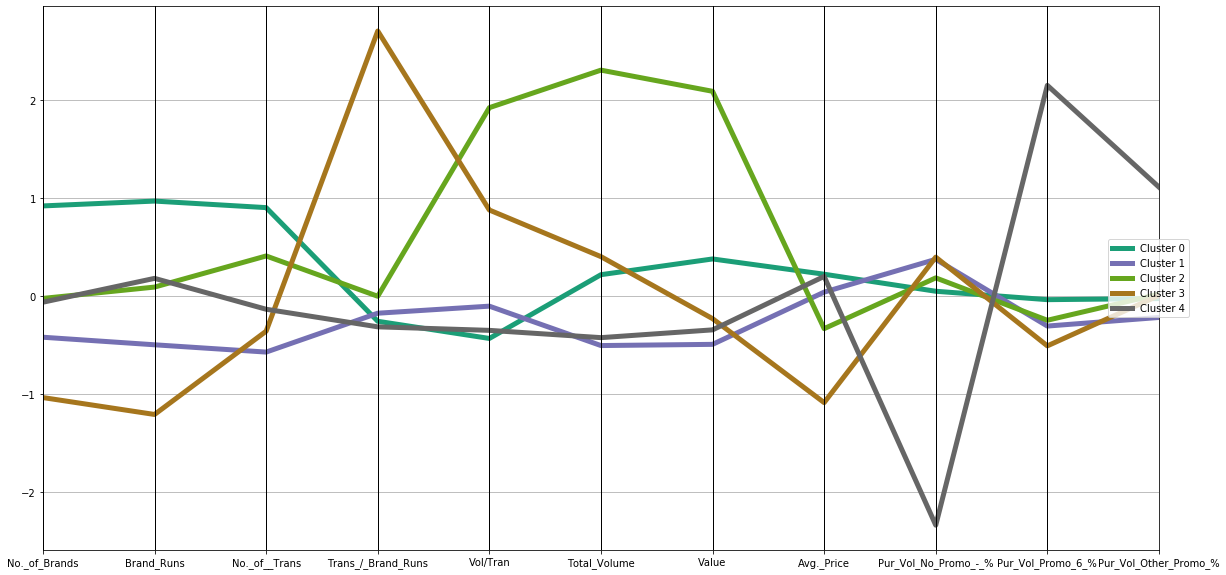

In [34]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(20,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
#plt.xlim(-0.5,5.3)
centroids

In [35]:
soap_df2_norm.groupby(kmeans.labels_).mean()

,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%
0,0.916839,0.966136,0.899475,-0.259189,-0.434264,0.215687,0.376164,0.220628,0.046912,-0.038888,-0.027635
1,-0.421862,-0.498885,-0.573247,-0.176966,-0.105031,-0.506724,-0.494429,0.038059,0.372362,-0.307983,-0.220251
2,-0.025926,0.089449,0.406640,-0.004217,1.918408,2.301038,2.085332,-0.334213,0.183170,-0.248791,0.017330
3,-1.036920,-1.209224,-0.360218,2.699985,0.875081,0.399835,-0.232417,-1.088338,0.394393,-0.509989,0.004122
4,-0.064739,0.178265,-0.136536,-0.315819,-0.351839,-0.425992,-0.346708,0.198234,-2.337896,2.145880,1.108757


In [36]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2,3,4
0,0.000000,2.784070,3.891374,4.802983,3.918452
1,2.784070,0.000000,4.512233,3.523724,4.005519
2,3.891374,4.512233,0.000000,4.622361,5.698421
3,4.802983,3.523724,4.622361,0.000000,5.622302
4,3.918452,4.005519,5.698421,5.622302,0.000000


In [37]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    15.396879
1    14.825546
2    18.724388
3    18.571371
4    19.244694
dtype: float64

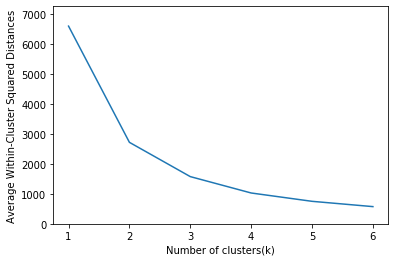

In [38]:
# Visualizing the elbow to know the exact clusters required for given variables based on purchase behaviour
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(soap_df2_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [39]:
#Step-2 Basis for Purchase.
#creating a new dataframe including only variables belongs to Basis for Purchase like(price, selling proposition), using member_id for indexing.
soap_df3=soap_df[['Member_id','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df3

,Member_id,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,1010010,0.233645,0.560748,0.130841,0.074766,0.501558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020,0.293381,0.547406,0.094812,0.064401,0.456172,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020,0.120130,0.318182,0.561688,0.000000,0.244589,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030,0.000000,0.400000,0.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190,0.000000,0.048193,0.144578,0.807229,0.807229,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,0.058172,0.941828,0.000000,0.000000,0.077562,0.000000,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000
596,1167230,0.534653,0.366337,0.000000,0.099010,0.168317,0.430693,0.074257,0.148515,0.000000,0.039604,0.000000,0.000000,0.089109,0.000000,0.049505
597,1167340,0.170103,0.649485,0.180412,0.000000,0.622852,0.127148,0.000000,0.030928,0.000000,0.038660,0.000000,0.000000,0.000000,0.180412,0.000000
598,1167350,0.136364,0.509091,0.209091,0.145455,0.690909,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027273,0.136364,0.000000


In [40]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df3=soap_df[['Member_id','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df3['Member_id']=soap_df3['Member_id'].astype(str)

#Clustering with K-means with 2 clusters
soap_df3.set_index('Member_id', inplace=True)
soap_df3 = soap_df3.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df3_norm = soap_df3.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=2, random_state=0).fit(soap_df3_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df3_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0 :  1014020, 1014030, 1017160, 1025140, 1025210, 1027040, 1027160, 1027210, 1027680, 1027720, 1027810, 1027840, 1028020, 1030040, 1030150, 1030280, 1030300, 1034020, 1035100, 1037050, 1037190, 1037250, 1037420, 1037690, 1037890, 1037940, 1038110, 1040080, 1044010, 1045100, 1047350, 1047420, 1050050, 1054270, 1055260, 1057150, 1058350, 1060330, 1060810, 1061500, 1061940, 1062220, 1062310, 1065040, 1065450, 1065510, 1065710, 1070040, 1070070, 1070140, 1070980, 1071340, 1071460, 1077500, 1080690, 1081110, 1081820, 1081900, 1082110, 1082190, 1082210, 1082260, 1085080, 1085480, 1085530, 1085590, 1097370, 1105130, 1106020, 1111180, 1111710, 1115100, 1125840, 1150970, 1156220, 1157860, 1158080, 1163830
1 :  1010010, 1010020, 1014190, 1017020, 1017110, 1017360, 1017460, 1017490, 1020070, 1020210, 1024050, 1024100, 1024120, 1024220, 1024400, 1024630, 1025070, 1027390, 1027480, 1027540, 1027580, 1027750, 1028050, 1028110, 1028230, 1030200, 1034130, 1034220, 1034350, 1035020, 1035150, 1037120, 1

In [41]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df3_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   Pr_Cat_1  Pr_Cat_2  Pr_Cat_3  Pr_Cat_4  PropCat_5  PropCat_6  PropCat_7  \
0    -0.791    -1.131     2.373    -0.321     -1.093     -0.190     -0.443   
1     0.118     0.169    -0.355     0.048      0.163      0.028      0.066   

   PropCat_8  PropCat_9  PropCat_10  PropCat_11  PropCat_12  PropCat_13  \
0     -0.457     -0.167      -0.257      -0.229      -0.168      -0.232   
1      0.068      0.025       0.038       0.034       0.025       0.035   

   PropCat_14  PropCat_15  
0       2.376      -0.215  
1      -0.355       0.032  


In [42]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df3_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df3_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (78 members): 232.31 within cluster 
Cluster 1 (522 members): 7405.27 within cluster 


,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,cluster
0,-0.790804,-1.131229,2.373219,-0.320848,-1.093152,-0.190072,-0.443118,-0.456981,-0.166758,-0.256810,-0.229474,-0.168121,-0.232433,2.375882,-0.214986,Cluster 0
1,0.118166,0.169034,-0.354619,0.047943,0.163344,0.028402,0.066213,0.068284,0.024918,0.038374,0.034289,0.025121,0.034731,-0.355017,0.032124,Cluster 1


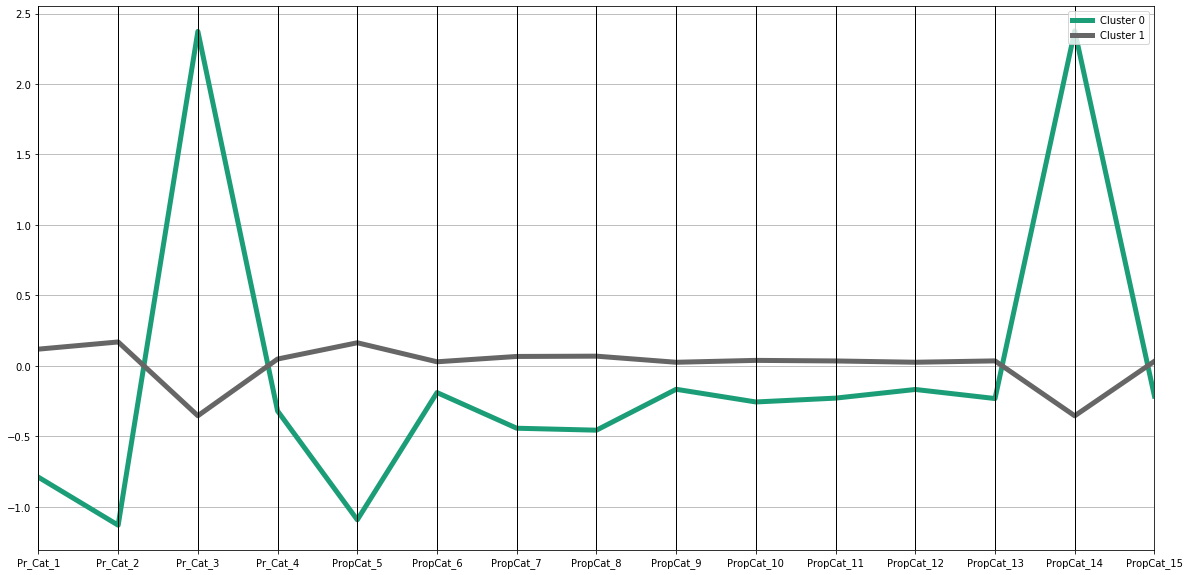

In [43]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(20,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
#plt.xlim(-0.5,5.3)
centroids

In [44]:
soap_df3_norm.groupby(kmeans.labels_).mean()

,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,-0.790804,-1.131229,2.373219,-0.320848,-1.093152,-0.190072,-0.443118,-0.456981,-0.166758,-0.256810,-0.229474,-0.168121,-0.232433,2.375882,-0.214986
1,0.118166,0.169034,-0.354619,0.047943,0.163344,0.028402,0.066213,0.068284,0.024918,0.038374,0.034289,0.025121,0.034731,-0.355017,0.032124


In [45]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1
0,0.000000,4.480724
1,4.480724,0.000000


In [46]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    4.480724
1    4.480724
dtype: float64

In [47]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df3=soap_df[['Member_id','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df3['Member_id']=soap_df3['Member_id'].astype(str)

#Clustering with K-means with 3 clusters
soap_df3.set_index('Member_id', inplace=True)
soap_df3 = soap_df3.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df3_norm = soap_df3.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=3, random_state=0).fit(soap_df3_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df3_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  1014020, 1014030, 1017160, 1025140, 1025210, 1027040, 1027160, 1027210, 1027680, 1027720, 1027810, 1027840, 1028020, 1030040, 1030150, 1030280, 1030300, 1034020, 1035100, 1037050, 1037190, 1037250, 1037420, 1037690, 1037890, 1037940, 1038110, 1040080, 1044010, 1045100, 1047350, 1047420, 1050050, 1054270, 1055260, 1057150, 1058350, 1060330, 1060810, 1061500, 1061940, 1062220, 1062310, 1065040, 1065450, 1065510, 1065710, 1070040, 1070070, 1070140, 1070980, 1071340, 1071460, 1077500, 1080180, 1080690, 1081110, 1081820, 1081900, 1082110, 1082190, 1082210, 1082260, 1085080, 1085480, 1085530, 1085590, 1097370, 1105130, 1106020, 1111180, 1111710, 1115100, 1125840, 1150970, 1156220, 1157860, 1158080, 1163830
1 :  1010010, 1010020, 1014190, 1017020, 1017110, 1017360, 1017490, 1020070, 1020210, 1024050, 1024100, 1024120, 1024220, 1024400, 1024630, 1027480, 1027540, 1027580, 1027750, 1028050, 1028110, 1028230, 1030200, 1034130, 1034220, 1034350, 1035020, 1037120, 1037220, 1037290, 1037630, 1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df3_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   Pr_Cat_1  Pr_Cat_2  Pr_Cat_3  Pr_Cat_4  PropCat_5  PropCat_6  PropCat_7  \
0    -0.783    -1.121     2.355    -0.323     -1.086     -0.171     -0.444   
1    -0.415     0.520    -0.314     0.201      0.392     -0.064     -0.047   
2     1.502    -0.738    -0.470    -0.345     -0.423      0.258      0.363   

   PropCat_8  PropCat_9  PropCat_10  PropCat_11  PropCat_12  PropCat_13  \
0     -0.458     -0.171      -0.257      -0.230      -0.161      -0.233   
1     -0.008      0.020      -0.154       0.110      -0.101      -0.201   
2      0.271      0.040       0.539      -0.158       0.351       0.649   

   PropCat_14  PropCat_15  
0       2.358      -0.216  
1      -0.317       0.035  
2      -0.463       0.028  


In [49]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df3_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df3_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (79 members): 240.30 within cluster 
Cluster 1 (376 members): 3765.45 within cluster 
Cluster 2 (145 members): 2785.18 within cluster 


,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,cluster
0,-0.783309,-1.121209,2.355000,-0.322644,-1.086235,-0.171150,-0.443780,-0.457852,-0.170860,-0.256906,-0.230348,-0.160716,-0.232800,2.357847,-0.215938,Cluster 0
1,-0.414721,0.520133,-0.313730,0.200923,0.391532,-0.063682,-0.046796,-0.008135,0.020459,-0.153944,0.109508,-0.101447,-0.201267,-0.316798,0.034575,Cluster 1
2,1.502184,-0.737893,-0.469534,-0.345229,-0.423473,0.258381,0.363130,0.270545,0.040038,0.539161,-0.158467,0.350625,0.648741,-0.463130,0.027991,Cluster 2


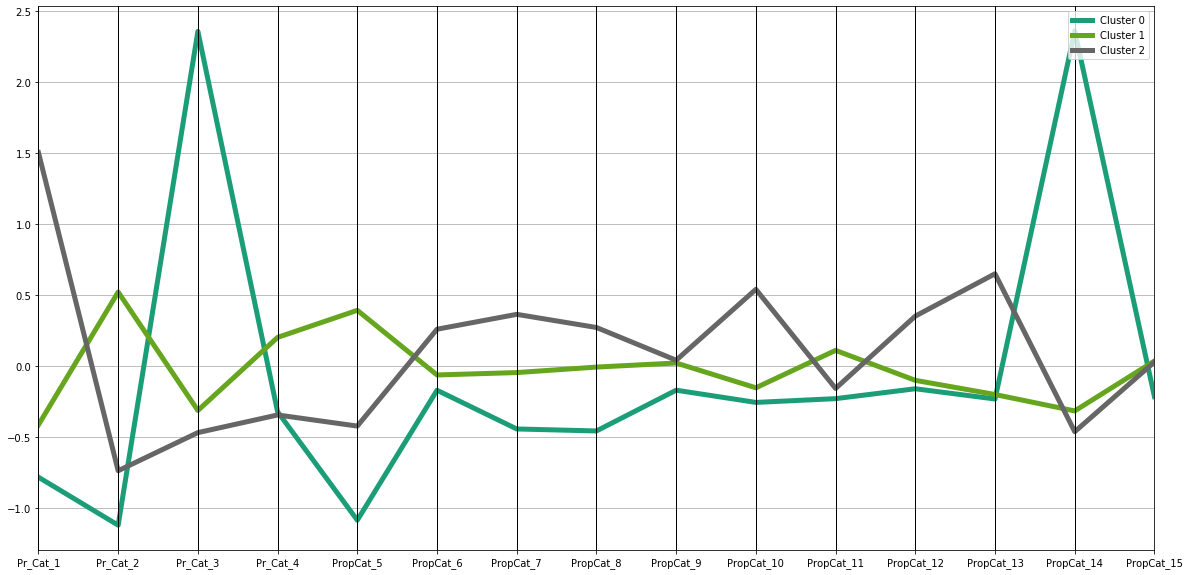

In [50]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(20,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
#plt.xlim(-0.5,5.3)
centroids

In [51]:
soap_df3_norm.groupby(kmeans.labels_).mean()

,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,-0.783309,-1.121209,2.355000,-0.322644,-1.086235,-0.171150,-0.443780,-0.457852,-0.170860,-0.256906,-0.230348,-0.160716,-0.232800,2.357847,-0.215938
1,-0.414721,0.520133,-0.313730,0.200923,0.391532,-0.063682,-0.046796,-0.008135,0.020459,-0.153944,0.109508,-0.101447,-0.201267,-0.316798,0.034575
2,1.502184,-0.737893,-0.469534,-0.345229,-0.423473,0.258381,0.363130,0.270545,0.040038,0.539161,-0.158467,0.350625,0.648741,-0.463130,0.027991


In [52]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2
0,0.000000,4.490544,4.989358
1,4.490544,0.000000,2.845048
2,4.989358,2.845048,0.000000


In [53]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    9.479902
1    7.335592
2    7.834406
dtype: float64

In [54]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df3=soap_df[['Member_id','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df3['Member_id']=soap_df3['Member_id'].astype(str)

#Clustering with K-means with 4 clusters
soap_df3.set_index('Member_id', inplace=True)
soap_df3 = soap_df3.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df3_norm = soap_df3.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=4, random_state=0).fit(soap_df3_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df3_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0 :  1010010, 1010020, 1017020, 1017110, 1017360, 1020070, 1024050, 1024100, 1024120, 1024220, 1024400, 1027480, 1027540, 1030200, 1034220, 1035020, 1037120, 1037220, 1037290, 1037720, 1037850, 1038000, 1038080, 1040150, 1040250, 1040340, 1044140, 1045060, 1045120, 1047220, 1047650, 1047750, 1047870, 1054110, 1055060, 1055160, 1055330, 1057280, 1057410, 1057500, 1057550, 1057800, 1058000, 1058010, 1058370, 1060050, 1060260, 1060370, 1060420, 1060650, 1060760, 1060920, 1060980, 1061080, 1061310, 1061400, 1061660, 1061700, 1061730, 1062120, 1065100, 1065160, 1065340, 1065370, 1065600, 1065780, 1070270, 1070300, 1070310, 1070330, 1070420, 1070500, 1070600, 1070660, 1070790, 1070880, 1071010, 1071090, 1071120, 1071500, 1071560, 1071640, 1071780, 1071800, 1071840, 1071910, 1075130, 1075200, 1075400, 1075420, 1075520, 1075610, 1075630, 1075690, 1077110, 1077200, 1077390, 1077570, 1080080, 1080220, 1080230, 1080330, 1080380, 1080390, 1080570, 1080950, 1081260, 1081410, 1081490, 1081530, 10817

In [55]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df3_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   Pr_Cat_1  Pr_Cat_2  Pr_Cat_3  Pr_Cat_4  PropCat_5  PropCat_6  PropCat_7  \
0    -0.354     0.746    -0.327    -0.237      0.265     -0.017      0.002   
1     1.615    -0.820    -0.470    -0.378     -0.419      0.311      0.395   
2    -0.495    -1.040    -0.276     2.802      0.920     -0.382     -0.303   
3    -0.783    -1.121     2.355    -0.323     -1.086     -0.171     -0.444   

   PropCat_8  PropCat_9  PropCat_10  PropCat_11  PropCat_12  PropCat_13  \
0      0.047      0.079      -0.140       0.150      -0.062      -0.180   
1      0.184     -0.077       0.615      -0.167       0.346       0.715   
2     -0.060     -0.059      -0.215      -0.198      -0.203      -0.241   
3     -0.458     -0.171      -0.257      -0.230      -0.161      -0.233   

   PropCat_14  PropCat_15  
0      -0.329       0.101  
1      -0.463      -0.055  
2      -0.283      -0.183  
3       2.358      -0.216  


In [56]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df3_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df3_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (337 members): 3247.44 within cluster 
Cluster 1 (129 members): 2460.42 within cluster 
Cluster 2 (55 members): 213.56 within cluster 
Cluster 3 (79 members): 240.30 within cluster 


,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,cluster
0,-0.353876,0.746333,-0.327355,-0.236873,0.264651,-0.016743,0.002224,0.046564,0.079258,-0.140100,0.150320,-0.061727,-0.179870,-0.329271,0.101337,Cluster 0
1,1.615194,-0.819548,-0.469504,-0.378140,-0.418574,0.311216,0.395071,0.184271,-0.077362,0.615039,-0.167205,0.346037,0.715215,-0.463141,-0.054564,Cluster 1
2,-0.494952,-1.040309,-0.275640,2.801730,0.920385,-0.381518,-0.302817,-0.059867,-0.058768,-0.215105,-0.198017,-0.202545,-0.241008,-0.282918,-0.182778,Cluster 2
3,-0.783309,-1.121209,2.355000,-0.322644,-1.086235,-0.171150,-0.443780,-0.457852,-0.170860,-0.256906,-0.230348,-0.160716,-0.232800,2.357847,-0.215938,Cluster 3


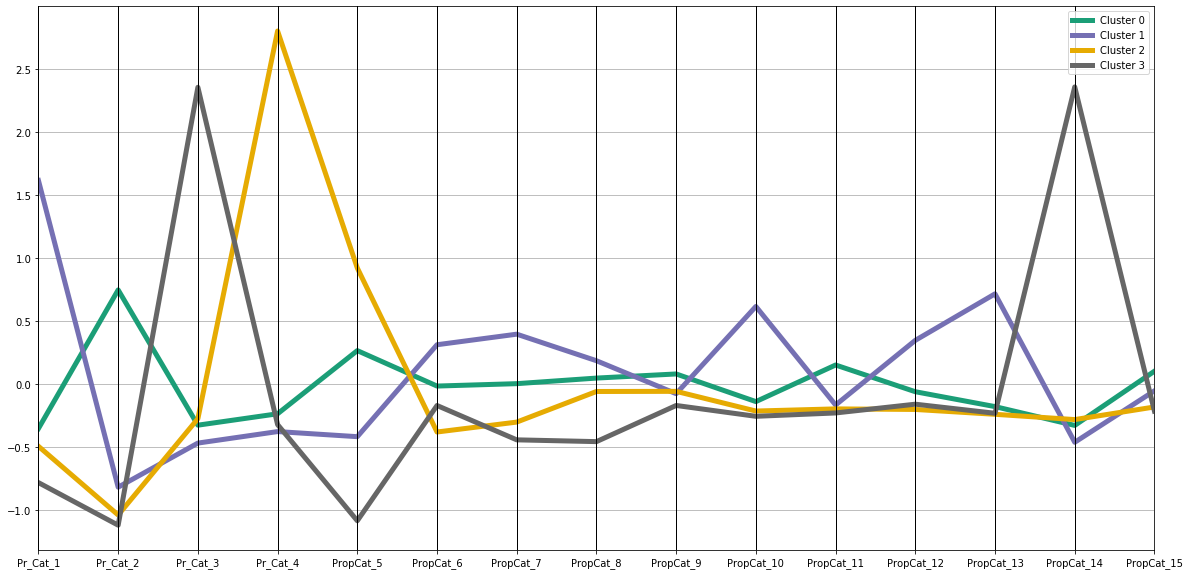

In [57]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(20,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
#plt.xlim(-0.5,5.3)
centroids

In [58]:
soap_df3_norm.groupby(kmeans.labels_).mean()

,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,-0.353876,0.746333,-0.327355,-0.236873,0.264651,-0.016743,0.002224,0.046564,0.079258,-0.140100,0.150320,-0.061727,-0.179870,-0.329271,0.101337
1,1.615194,-0.819548,-0.469504,-0.378140,-0.418574,0.311216,0.395071,0.184271,-0.077362,0.615039,-0.167205,0.346037,0.715215,-0.463141,-0.054564
2,-0.494952,-1.040309,-0.275640,2.801730,0.920385,-0.381518,-0.302817,-0.059867,-0.058768,-0.215105,-0.198017,-0.202545,-0.241008,-0.282918,-0.182778
3,-0.783309,-1.121209,2.355000,-0.322644,-1.086235,-0.171150,-0.443780,-0.457852,-0.170860,-0.256906,-0.230348,-0.160716,-0.232800,2.357847,-0.215938


In [59]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2,3
0,0.000000,2.970234,3.656180,4.553194
1,2.970234,0.000000,4.407336,5.052893
2,3.656180,4.407336,0.000000,5.292695
3,4.553194,5.052893,5.292695,0.000000


In [60]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    11.179608
1    12.430463
2    13.356211
3    14.898782
dtype: float64

In [61]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df3=soap_df[['Member_id','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df3['Member_id']=soap_df3['Member_id'].astype(str)

#Clustering with K-means with 5 clusters
soap_df3.set_index('Member_id', inplace=True)
soap_df3 = soap_df3.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df3_norm = soap_df3.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=5, random_state=0).fit(soap_df3_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df3_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0 :  1010020, 1017110, 1017360, 1020070, 1024050, 1024120, 1024220, 1024400, 1027480, 1027540, 1034220, 1035020, 1037120, 1037220, 1037290, 1037720, 1037850, 1038000, 1038080, 1040150, 1040250, 1040340, 1044140, 1045120, 1047220, 1047650, 1047750, 1047870, 1054110, 1055060, 1055160, 1055330, 1057280, 1057410, 1057500, 1057550, 1057800, 1058000, 1058010, 1058370, 1060050, 1060260, 1060370, 1060420, 1060650, 1060760, 1060920, 1060980, 1061080, 1061310, 1061400, 1061660, 1061700, 1061730, 1062120, 1065100, 1065160, 1065340, 1065370, 1065600, 1065780, 1070270, 1070300, 1070310, 1070330, 1070420, 1070500, 1070600, 1070660, 1070790, 1070880, 1071010, 1071090, 1071120, 1071500, 1071560, 1071640, 1071780, 1071800, 1071840, 1071910, 1075130, 1075200, 1075400, 1075420, 1075520, 1075610, 1075630, 1075690, 1077110, 1077200, 1077390, 1077570, 1080080, 1080220, 1080230, 1080330, 1080380, 1080390, 1080570, 1080950, 1081260, 1081410, 1081490, 1081530, 1081720, 1081850, 1082020, 1085230, 1085290, 10854

In [62]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df3_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   Pr_Cat_1  Pr_Cat_2  Pr_Cat_3  Pr_Cat_4  PropCat_5  PropCat_6  PropCat_7  \
0    -0.379     0.769    -0.325    -0.241      0.334      0.007  5.425e-04   
1    -0.783    -1.121     2.355    -0.323     -1.086     -0.171 -4.438e-01   
2     1.601    -0.808    -0.470    -0.375     -0.420      0.288  4.234e-01   
3    -0.113     0.511    -0.343    -0.185     -0.612     -0.235 -1.703e-01   
4    -0.495    -1.040    -0.276     2.802      0.920     -0.382 -3.028e-01   

   PropCat_8  PropCat_9  PropCat_10  PropCat_11  PropCat_12  PropCat_13  \
0      0.030      0.070      -0.137       0.177      -0.055      -0.189   
1     -0.458     -0.171      -0.257      -0.230      -0.161      -0.233   
2      0.231     -0.009       0.598      -0.167       0.303       0.666   
3     -0.005     -0.169      -0.143      -0.189       0.056       0.146   
4     -0.060     -0.059      -0.215      -0.198      -0.203      -0.241   

   PropCat_14  PropCat_15  
0      -0.327      -0.186  
1       2.358      -0.21

In [63]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df3_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df3_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (312 members): 2572.80 within cluster 
Cluster 1 (79 members): 240.30 within cluster 
Cluster 2 (131 members): 2489.01 within cluster 
Cluster 3 (23 members): 181.36 within cluster 
Cluster 4 (55 members): 213.56 within cluster 


,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,cluster
0,-0.378525,0.768990,-0.324943,-0.240957,0.334383,0.006970,0.000542,0.029693,0.069738,-0.137475,0.177195,-0.055087,-0.189010,-0.327431,-0.185698,Cluster 0
1,-0.783309,-1.121209,2.355000,-0.322644,-1.086235,-0.171150,-0.443780,-0.457852,-0.170860,-0.256906,-0.230348,-0.160716,-0.232800,2.357847,-0.215938,Cluster 1
2,1.601490,-0.808234,-0.470272,-0.375375,-0.420293,0.288106,0.423363,0.231402,-0.008783,0.597755,-0.166863,0.303256,0.666127,-0.463909,-0.115559,Cluster 2
3,-0.112683,0.510706,-0.343347,-0.184933,-0.612077,-0.235312,-0.170272,-0.005000,-0.168584,-0.142924,-0.188575,0.056399,0.145870,-0.338208,4.355994,Cluster 3
4,-0.494952,-1.040309,-0.275640,2.801730,0.920385,-0.381518,-0.302817,-0.059867,-0.058768,-0.215105,-0.198017,-0.202545,-0.241008,-0.282918,-0.182778,Cluster 4


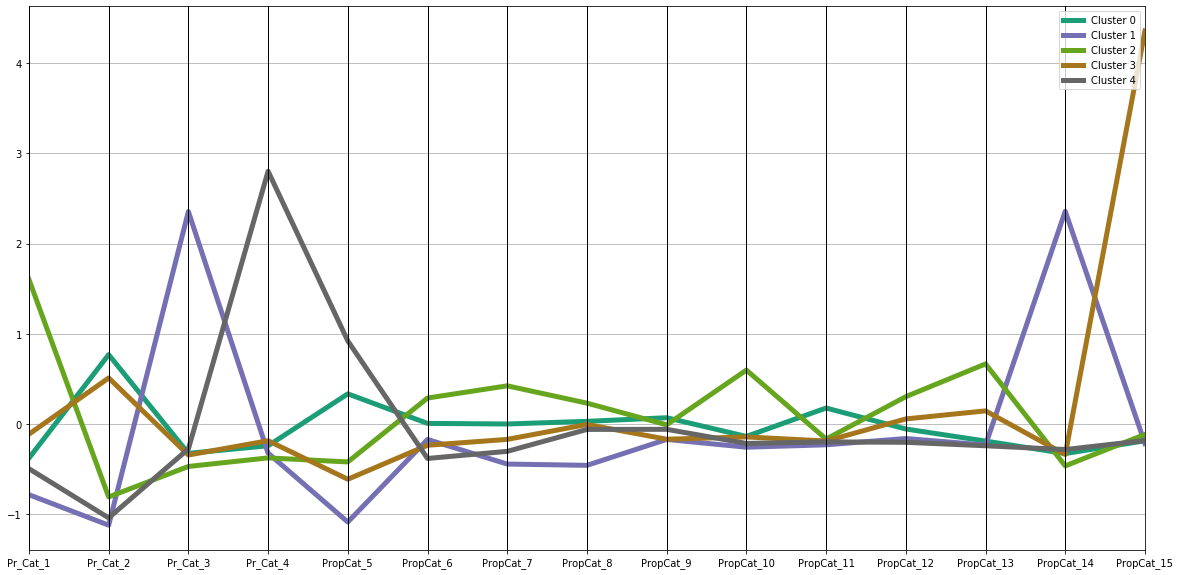

In [64]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(20,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
#plt.xlim(-0.5,5.3)
centroids

In [65]:
soap_df3_norm.groupby(kmeans.labels_).mean()

,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,-0.378525,0.768990,-0.324943,-0.240957,0.334383,0.006970,0.000542,0.029693,0.069738,-0.137475,0.177195,-0.055087,-0.189010,-0.327431,-0.185698
1,-0.783309,-1.121209,2.355000,-0.322644,-1.086235,-0.171150,-0.443780,-0.457852,-0.170860,-0.256906,-0.230348,-0.160716,-0.232800,2.357847,-0.215938
2,1.601490,-0.808234,-0.470272,-0.375375,-0.420293,0.288106,0.423363,0.231402,-0.008783,0.597755,-0.166863,0.303256,0.666127,-0.463909,-0.115559
3,-0.112683,0.510706,-0.343347,-0.184933,-0.612077,-0.235312,-0.170272,-0.005000,-0.168584,-0.142924,-0.188575,0.056399,0.145870,-0.338208,4.355994
4,-0.494952,-1.040309,-0.275640,2.801730,0.920385,-0.381518,-0.302817,-0.059867,-0.058768,-0.215105,-0.198017,-0.202545,-0.241008,-0.282918,-0.182778


In [66]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2,3,4
0,0.000000,4.568744,2.977187,4.697659,3.651250
1,4.568744,0.000000,5.040638,6.268836,5.292695
2,2.977187,5.040638,0.000000,5.134805,4.383949
3,4.697659,6.268836,5.134805,0.000000,5.891054
4,3.651250,5.292695,4.383949,5.891054,0.000000


In [67]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    15.894840
1    21.170913
2    17.536578
3    21.992353
4    19.218948
dtype: float64

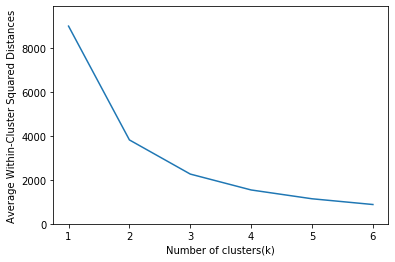

In [68]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(soap_df3_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [69]:
#Step-3 combining the variables from step 1(Purchase Behaviour) and 2(Basis on purchase) 
#using member_id for indexing.
soap_df4=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran',
                  'Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%',
                  'Pur_Vol_Other_Promo_%','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df4

,Member_id,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,...,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,1010010,3,17,24,1.41,334.38,8025,818.00,10.19,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020,5,25,40,1.60,349.38,13975,1681.50,12.03,0.887299,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020,5,37,63,1.70,366.67,23100,1950.00,8.44,0.941558,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030,2,4,4,1.00,375.00,1500,114.00,7.60,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190,3,6,13,2.17,638.46,8300,591.00,7.12,0.614458,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,3,5,22,4.40,410.23,9025,1218.00,13.50,0.775623,...,0.000000,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000
596,1167230,5,23,28,1.22,180.36,5050,851.00,16.85,0.925743,...,0.430693,0.074257,0.148515,0.000000,0.039604,0.000000,0.000000,0.089109,0.000000,0.049505
597,1167340,4,19,25,1.32,1164.00,29100,3302.75,11.35,1.000000,...,0.127148,0.000000,0.030928,0.000000,0.038660,0.000000,0.000000,0.000000,0.180412,0.000000
598,1167350,3,15,19,1.27,289.47,5500,460.00,8.36,0.759091,...,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027273,0.136364,0.000000


In [70]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df4=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran',
                  'Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%',
                  'Pur_Vol_Other_Promo_%','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df4['Member_id']=soap_df4['Member_id'].astype(str)

#Clustering with K-means with 2 clusters
soap_df4.set_index('Member_id', inplace=True)
soap_df4 = soap_df4.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df4_norm = soap_df4.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=2, random_state=0).fit(soap_df4_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df4_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0 :  1014030, 1017160, 1025140, 1025210, 1027040, 1027160, 1027210, 1027680, 1027720, 1027810, 1027840, 1028020, 1030040, 1030150, 1030280, 1030300, 1034020, 1035100, 1037050, 1037190, 1037250, 1037420, 1037690, 1037890, 1037940, 1038110, 1044010, 1045100, 1047420, 1050050, 1054270, 1055260, 1057150, 1058350, 1060330, 1060810, 1061500, 1061940, 1062220, 1062310, 1065040, 1065450, 1065510, 1065710, 1070040, 1070070, 1070140, 1070980, 1071340, 1071460, 1077500, 1080690, 1081110, 1081820, 1081900, 1082110, 1082190, 1082210, 1082260, 1085080, 1085480, 1085590, 1097370, 1106020, 1111710, 1115100, 1125840, 1156220, 1157860, 1158080, 1163830
1 :  1010010, 1010020, 1014020, 1014190, 1017020, 1017110, 1017360, 1017460, 1017490, 1020070, 1020210, 1024050, 1024100, 1024120, 1024220, 1024400, 1024630, 1025070, 1027390, 1027480, 1027540, 1027580, 1027750, 1028050, 1028110, 1028230, 1030200, 1034130, 1034220, 1034350, 1035020, 1035150, 1037120, 1037220, 1037290, 1037630, 1037720, 1037850, 1038000, 1

In [71]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df4_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   No._of_Brands  Brand_Runs  No._of__Trans  Trans_/_Brand_Runs  Vol/Tran  \
0         -0.555      -0.783         -0.424               1.019     0.529   
1          0.074       0.105          0.057              -0.137    -0.071   

   Total_Volume  Value  Avg._Price  Pur_Vol_No_Promo_-_%  Pur_Vol_Promo_6_%  \
0         0.113 -0.537      -1.319                 0.190             -0.412   
1        -0.015  0.072       0.177                -0.025              0.055   

   ...  PropCat_6  PropCat_7  PropCat_8  PropCat_9  PropCat_10  PropCat_11  \
0  ...     -0.251     -0.455     -0.476     -0.142      -0.256      -0.226   
1  ...      0.034      0.061      0.064      0.019       0.034       0.030   

   PropCat_12  PropCat_13  PropCat_14  PropCat_15  
0      -0.172      -0.241       2.488      -0.244  
1       0.023       0.032      -0.334       0.033  

[2 rows x 26 columns]


In [72]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df4_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df4_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (71 members): 919.92 within cluster 
Cluster 1 (529 members): 12959.83 within cluster 


,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,...,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,cluster
0,-0.555061,-0.782835,-0.423752,1.018558,0.529036,0.113139,-0.537248,-1.318942,0.189549,-0.411604,...,-0.454594,-0.475955,-0.142185,-0.256065,-0.225942,-0.172375,-0.241162,2.487632,-0.243677,Cluster 0
1,0.074498,0.105069,0.056874,-0.136706,-0.071005,-0.015185,0.072107,0.177022,-0.025440,0.055244,...,0.061014,0.063881,0.019083,0.034368,0.030325,0.023135,0.032368,-0.333879,0.032705,Cluster 1


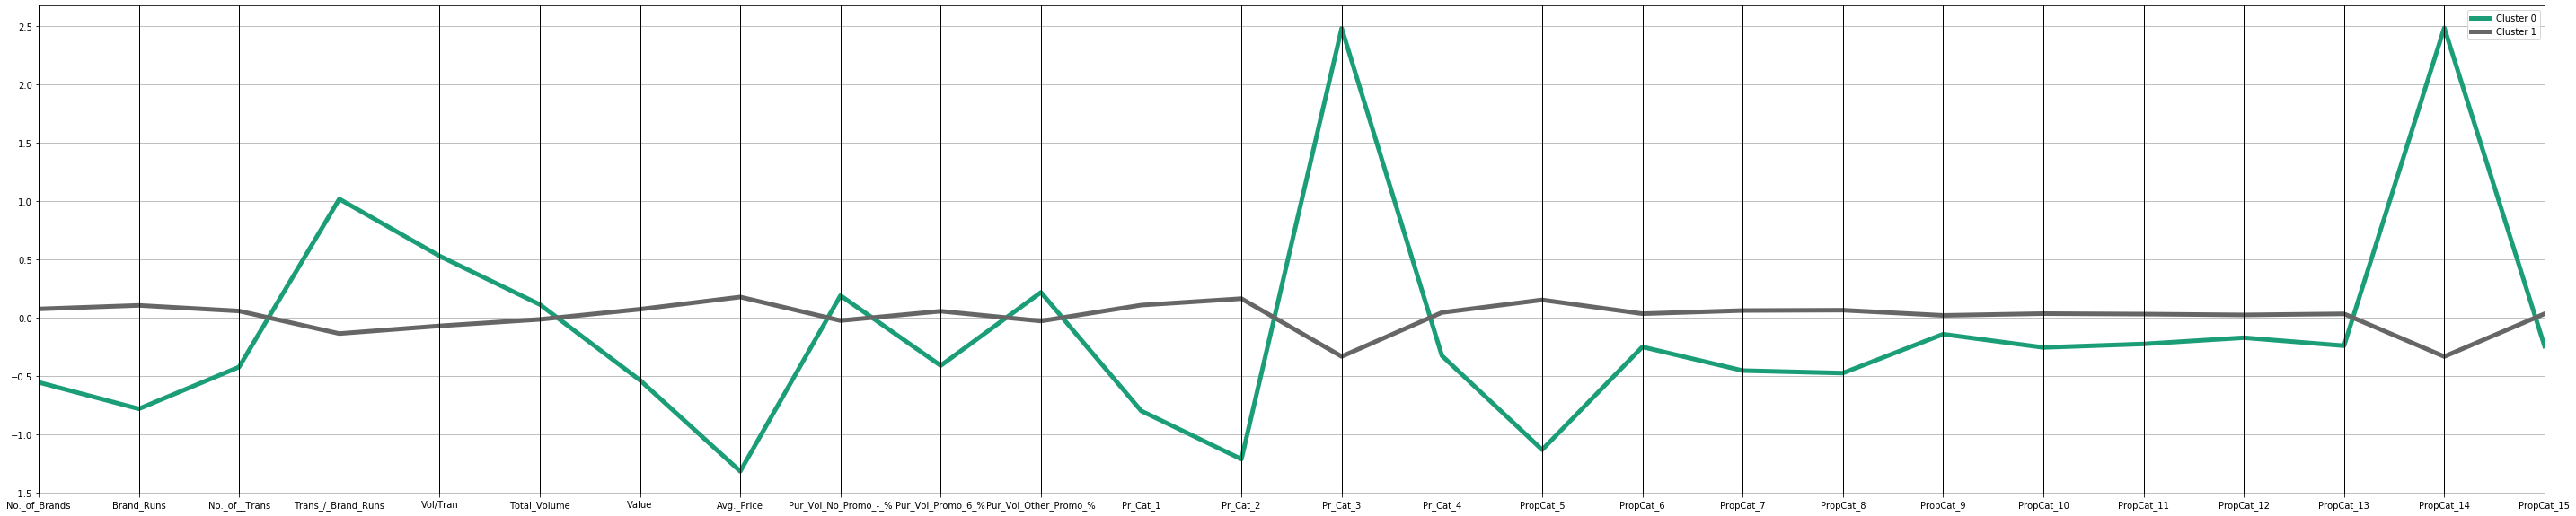

In [73]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(50,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
#plt.xlim(-0.5,5.3)
centroids

In [74]:
soap_df4_norm.groupby(kmeans.labels_).mean()

,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,...,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,-0.555061,-0.782835,-0.423752,1.018558,0.529036,0.113139,-0.537248,-1.318942,0.189549,-0.411604,...,-0.251253,-0.454594,-0.475955,-0.142185,-0.256065,-0.225942,-0.172375,-0.241162,2.487632,-0.243677
1,0.074498,0.105069,0.056874,-0.136706,-0.071005,-0.015185,0.072107,0.177022,-0.025440,0.055244,...,0.033722,0.061014,0.063881,0.019083,0.034368,0.030325,0.023135,0.032368,-0.333879,0.032705


In [75]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1
0,0.000000,5.242205
1,5.242205,0.000000


In [76]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    5.242205
1    5.242205
dtype: float64

In [77]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df4=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran',
                  'Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%',
                  'Pur_Vol_Other_Promo_%','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df4['Member_id']=soap_df4['Member_id'].astype(str)

#Clustering with K-means with 3 clusters
soap_df4.set_index('Member_id', inplace=True)
soap_df4 = soap_df4.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df4_norm = soap_df4.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=3, random_state=0).fit(soap_df4_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df4_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0 :  1010010, 1010020, 1014020, 1014190, 1017020, 1017110, 1017360, 1017490, 1020070, 1020210, 1024050, 1024100, 1024120, 1024220, 1024400, 1024630, 1027480, 1027540, 1027580, 1027750, 1028050, 1028110, 1028230, 1030200, 1034130, 1034220, 1034350, 1035020, 1037120, 1037220, 1037290, 1037630, 1037720, 1037850, 1038000, 1038080, 1040080, 1040150, 1040190, 1040250, 1040340, 1040370, 1044140, 1044370, 1045060, 1045120, 1047210, 1047220, 1047350, 1047750, 1047760, 1047870, 1054110, 1055060, 1055160, 1055330, 1057280, 1057410, 1057500, 1057510, 1057550, 1057580, 1057800, 1058000, 1058010, 1058190, 1058370, 1060050, 1060130, 1060150, 1060260, 1060370, 1060420, 1060590, 1060640, 1060650, 1060720, 1060760, 1060920, 1060980, 1061080, 1061180, 1061310, 1061400, 1061660, 1061700, 1061730, 1061820, 1061830, 1062120, 1065080, 1065100, 1065340, 1065370, 1065600, 1065780, 1070040, 1070270, 1070300, 1070310, 1070330, 1070420, 1070500, 1070600, 1070660, 1070670, 1070880, 1071010, 1071090, 1071120, 10715

In [78]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df4_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   No._of_Brands  Brand_Runs  No._of__Trans  Trans_/_Brand_Runs  Vol/Tran  \
0          0.113       0.053          0.107              -0.074     0.179   
1         -0.584      -0.801         -0.434               1.038     0.514   
2          0.011       0.203         -0.034              -0.252    -0.516   

   Total_Volume  Value  Avg._Price  Pur_Vol_No_Promo_-_%  Pur_Vol_Promo_6_%  \
0         0.252  0.161      -0.295                 0.207             -0.153   
1         0.083 -0.556      -1.319                 0.210             -0.436   
2        -0.489 -0.087       1.027                -0.454              0.442   

   ...  PropCat_6  PropCat_7  PropCat_8  PropCat_9  PropCat_10  PropCat_11  \
0  ...     -0.020     -0.032     -0.208      0.060      -0.181       0.080   
1  ...     -0.248     -0.456     -0.476     -0.137      -0.256      -0.226   
2  ...      0.129      0.228      0.555     -0.058       0.424      -0.061   

   PropCat_12  PropCat_13  PropCat_14  PropCat_15  
0      -0

In [79]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df4_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df4_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (342 members): 6199.27 within cluster 
Cluster 1 (70 members): 895.46 within cluster 
Cluster 2 (188 members): 5580.77 within cluster 


,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,...,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,cluster
0,0.113484,0.052617,0.107228,-0.073885,0.178618,0.251790,0.161435,-0.294706,0.206627,-0.153465,...,-0.032367,-0.207887,0.060237,-0.180798,0.079997,-0.126520,-0.202091,-0.253461,0.008548,Cluster 0
1,-0.584380,-0.801237,-0.433782,1.038092,0.514269,0.083456,-0.556079,-1.319353,0.210391,-0.436369,...,-0.455526,-0.475972,-0.137204,-0.255947,-0.226035,-0.172868,-0.241261,2.500406,-0.253735,Cluster 1
2,0.011143,0.202614,-0.033549,-0.252116,-0.516416,-0.489117,-0.086624,1.027363,-0.454222,0.441653,...,0.228491,0.555401,-0.058493,0.424198,-0.061365,0.294525,0.457465,-0.469920,0.078926,Cluster 2


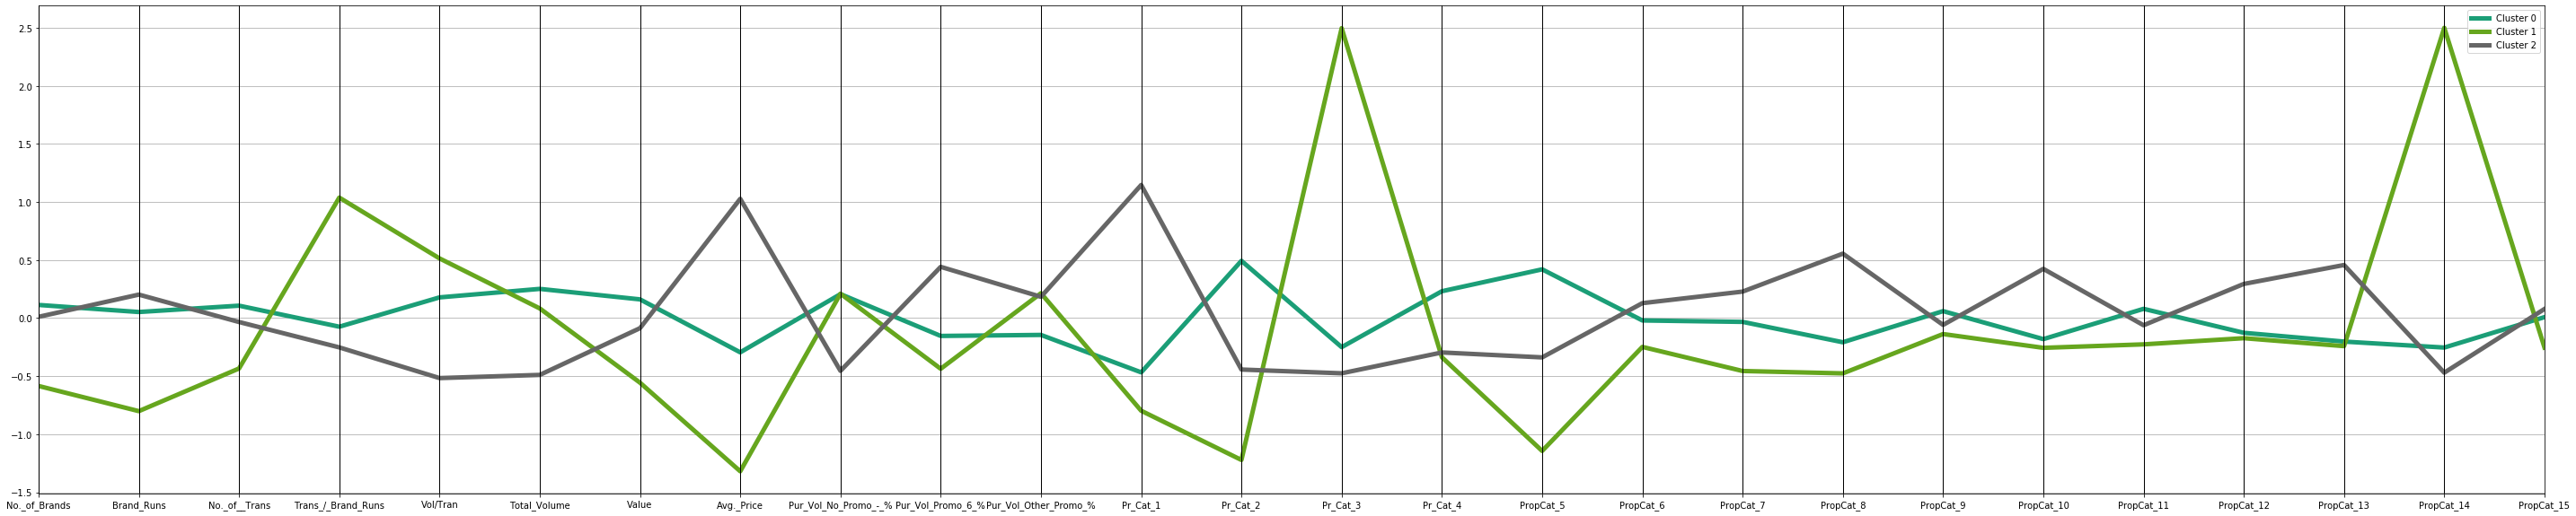

In [80]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(50,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
#plt.xlim(-0.5,5.3)
centroids

In [81]:
soap_df4_norm.groupby(kmeans.labels_).mean()

,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,...,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,0.113484,0.052617,0.107228,-0.073885,0.178618,0.251790,0.161435,-0.294706,0.206627,-0.153465,...,-0.020081,-0.032367,-0.207887,0.060237,-0.180798,0.079997,-0.126520,-0.202091,-0.253461,0.008548
1,-0.584380,-0.801237,-0.433782,1.038092,0.514269,0.083456,-0.556079,-1.319353,0.210391,-0.436369,...,-0.248020,-0.455526,-0.475972,-0.137204,-0.255947,-0.226035,-0.172868,-0.241261,2.500406,-0.253735
2,0.011143,0.202614,-0.033549,-0.252116,-0.516416,-0.489117,-0.086624,1.027363,-0.454222,0.441653,...,0.128879,0.228491,0.555401,-0.058493,0.424198,-0.061365,0.294525,0.457465,-0.469920,0.078926


In [82]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2
0,0.000000,5.111512,3.153955
1,5.111512,0.000000,6.099636
2,3.153955,6.099636,0.000000


In [83]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0     8.265467
1    11.211147
2     9.253591
dtype: float64

In [84]:
#we used this for modeling.
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df4=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran',
                  'Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%',
                  'Pur_Vol_Other_Promo_%','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df4['Member_id']=soap_df4['Member_id'].astype(str)

#Clustering with K-means with 4 clusters
soap_df4.set_index('Member_id', inplace=True)
soap_df4 = soap_df4.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df4_norm = soap_df4.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=4, random_state=0).fit(soap_df4_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df4_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0 :  1017460, 1025070, 1045030, 1047610, 1047980, 1050210, 1054310, 1060230, 1061130, 1061380, 1061580, 1062270, 1065660, 1075730, 1080470, 1080750, 1081140, 1081640, 1085220, 1085630, 1090040, 1097530, 1100510, 1105370, 1105580, 1106180, 1106290, 1106570, 1110140, 1110290, 1110540, 1111100, 1111280, 1111500, 1116580, 1120550, 1120560, 1120690, 1120870, 1121270, 1121440, 1121450, 1121660, 1125190, 1125480, 1125910, 1134090, 1135240, 1135320, 1137150, 1137580, 1140360, 1140480, 1140500, 1140570, 1140890, 1141020, 1141130, 1145330, 1145390, 1145440, 1145780, 1145960, 1146030, 1146060, 1146240, 1146620, 1146930, 1146970, 1147580, 1147590, 1147850, 1148010, 1148070, 1148330, 1148480, 1150490, 1150910, 1151190, 1151290, 1151460, 1152170, 1152360, 1155150, 1155250, 1155360, 1155460, 1155700, 1155820, 1155870, 1155960, 1156690, 1156770, 1156990, 1157310, 1157360, 1161340, 1161390, 1162260, 1163230, 1163300, 1163560, 1165070, 1165090, 1165310, 1167230
1 :  1010010, 1014190, 1017020, 1017110, 1

In [85]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df4_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   No._of_Brands  Brand_Runs  No._of__Trans  Trans_/_Brand_Runs  Vol/Tran  \
0         -0.373      -0.262         -0.360              -0.151    -0.479   
1         -0.348      -0.425         -0.382              -0.011     0.367   
2          0.891       1.010          0.871              -0.294    -0.398   
3         -0.584      -0.801         -0.434               1.038     0.514   

   Total_Volume  Value  Avg._Price  Pur_Vol_No_Promo_-_%  Pur_Vol_Promo_6_%  \
0        -0.613 -0.124       1.444                 0.177             -0.177   
1         0.031 -0.084      -0.340                 0.250             -0.247   
2         0.280  0.392       0.114                -0.508              0.590   
3         0.083 -0.556      -1.319                 0.210             -0.436   

   ...  PropCat_6  PropCat_7  PropCat_8  PropCat_9  PropCat_10  PropCat_11  \
0  ...      0.296      0.332      0.113     -0.271       0.699      -0.211   
1  ...     -0.181     -0.075     -0.182     -0.093      -0.187

In [86]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df4_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df3_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (106 members): 3044.83 within cluster 
Cluster 1 (240 members): 4474.14 within cluster 
Cluster 2 (184 members): 3352.12 within cluster 
Cluster 3 (70 members): 895.46 within cluster 


,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,...,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,cluster
0,-0.373479,-0.262169,-0.360425,-0.150598,-0.479085,-0.612548,-0.124424,1.444432,0.177310,-0.176849,...,0.331615,0.112995,-0.270855,0.699124,-0.211321,0.368276,0.824813,-0.472842,-0.121051,Cluster 0
1,-0.347928,-0.424937,-0.381857,-0.010996,0.366635,0.031291,-0.083769,-0.340401,0.250155,-0.246975,...,-0.074550,-0.181690,-0.092513,-0.187039,0.095214,-0.155021,-0.238900,-0.308768,-0.006226,Cluster 1
2,0.891294,1.010116,0.870736,-0.293826,-0.397870,0.280317,0.392495,0.113811,-0.508475,0.590031,...,0.079498,0.352968,0.328902,-0.061420,0.083539,0.055808,-0.071772,-0.276102,0.174386,Cluster 2
3,-0.584380,-0.801237,-0.433782,1.038092,0.514269,0.083456,-0.556079,-1.319353,0.210391,-0.436369,...,-0.455526,-0.475972,-0.137204,-0.255947,-0.226035,-0.172868,-0.241261,2.500406,-0.253735,Cluster 3


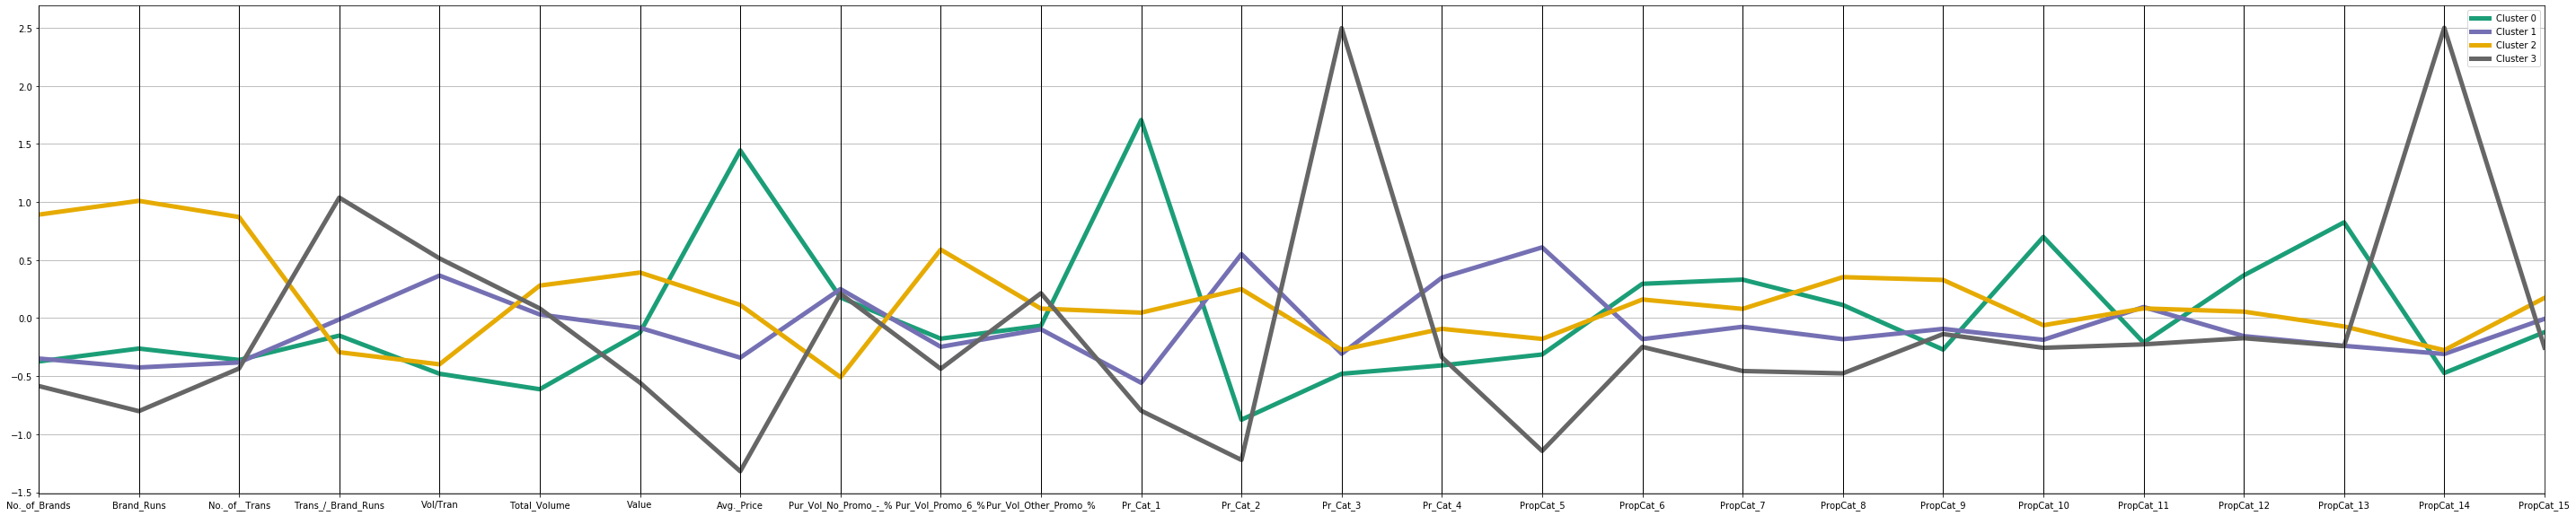

In [87]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(50,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
#plt.xlim(-0.5,5.3)
centroids

In [88]:
#Insights from the above cluster-
#Brand_runs, No. of brand, No. of trans more for 3rd cluster.
#Trans_brand_runs more for 4th cluster, avg price is lowest for 4th cluster.
#3rd cluster buys more on promotion of 6%, whereas 4th cluster buys more in other promotions.
#Cluster 1 buys more in price category 1, cluster 4 buys more in price category in 3
#Cluster 2 buys more in proposition category 5 whereas, cluster 4 buys less in this category.
#Cluster 1 buys more in proposition category 10 and 13
#Cluster 4 buys most in proposition category 14


In [89]:
soap_df4_norm.groupby(kmeans.labels_).mean()

,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,...,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,-0.373479,-0.262169,-0.360425,-0.150598,-0.479085,-0.612548,-0.124424,1.444432,0.177310,-0.176849,...,0.295671,0.331615,0.112995,-0.270855,0.699124,-0.211321,0.368276,0.824813,-0.472842,-0.121051
1,-0.347928,-0.424937,-0.381857,-0.010996,0.366635,0.031291,-0.083769,-0.340401,0.250155,-0.246975,...,-0.181099,-0.074550,-0.181690,-0.092513,-0.187039,0.095214,-0.155021,-0.238900,-0.308768,-0.006226
2,0.891294,1.010116,0.870736,-0.293826,-0.397870,0.280317,0.392495,0.113811,-0.508475,0.590031,...,0.160240,0.079498,0.352968,0.328902,-0.061420,0.083539,0.055808,-0.071772,-0.276102,0.174386
3,-0.584380,-0.801237,-0.433782,1.038092,0.514269,0.083456,-0.556079,-1.319353,0.210391,-0.436369,...,-0.248020,-0.455526,-0.475972,-0.137204,-0.255947,-0.226035,-0.172868,-0.241261,2.500406,-0.253735


In [90]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2,3
0,0.000000,3.977874,3.879082,6.294806
1,3.977874,0.000000,3.103348,5.055029
2,3.879082,3.103348,0.000000,5.946419
3,6.294806,5.055029,5.946419,0.000000


In [91]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    14.151762
1    12.136251
2    12.928850
3    17.296253
dtype: float64

In [92]:
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df4=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran',
                  'Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%',
                  'Pur_Vol_Other_Promo_%','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df4['Member_id']=soap_df4['Member_id'].astype(str)

#Clustering with K-means with 5 clusters
soap_df4.set_index('Member_id', inplace=True)
soap_df4 = soap_df4.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df4_norm = soap_df4.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=5, random_state=0).fit(soap_df4_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df4_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))


0 :  1014190, 1017490, 1025070, 1044140, 1047650, 1047760, 1057550, 1058190, 1060130, 1060150, 1060590, 1065080, 1065160, 1071800, 1075220, 1075690, 1080250, 1080590, 1081720, 1085340, 1095130, 1097370, 1101070, 1104380, 1105830, 1106810, 1110370, 1111280, 1116000, 1116730, 1120150, 1121780, 1125100, 1140670, 1141110, 1145380, 1146060, 1146840, 1150620, 1150720, 1150750, 1151420, 1152050, 1155080, 1155580, 1156970, 1157180, 1157190, 1157320, 1157490, 1157830, 1157860, 1160140, 1160540, 1161920, 1162150, 1162360, 1162660, 1162680, 1162960, 1165100, 1165160, 1165390, 1165720, 1166870, 1167090, 1167350
1 :  1010020, 1014020, 1017020, 1020070, 1024120, 1024220, 1027390, 1035150, 1037220, 1037850, 1038080, 1040080, 1040150, 1040370, 1047350, 1055060, 1055160, 1055330, 1057800, 1057930, 1058010, 1060260, 1060370, 1060420, 1060640, 1060720, 1061180, 1061310, 1061700, 1065100, 1065650, 1070040, 1070270, 1070300, 1070330, 1070420, 1070600, 1070790, 1071010, 1071780, 1071840, 1075130, 1075350, 1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df4_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   No._of_Brands  Brand_Runs  No._of__Trans  Trans_/_Brand_Runs  Vol/Tran  \
0          0.003       0.249         -0.112              -0.354    -0.387   
1          1.030       1.131          1.110              -0.259    -0.262   
2         -0.300      -0.415         -0.356               0.013     0.348   
3         -0.367      -0.289         -0.406              -0.156    -0.480   
4         -0.611      -0.815         -0.419               1.102     0.546   

   Total_Volume  Value  Avg._Price  Pur_Vol_No_Promo_-_%  Pur_Vol_Promo_6_%  \
0        -0.444 -0.350       0.184                -2.081              2.061   
1         0.616  0.734       0.048                 0.042             -0.032   
2         0.022 -0.098      -0.347                 0.395             -0.326   
3        -0.662 -0.208       1.405                 0.268             -0.280   
4         0.111 -0.547      -1.350                 0.275             -0.484   

   ...  PropCat_6  PropCat_7  PropCat_8  PropCat_9  PropCat_10

In [94]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(soap_df4_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=soap_df3_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (67 members): 1787.32 within cluster 
Cluster 1 (141 members): 2207.96 within cluster 
Cluster 2 (220 members): 3551.30 within cluster 
Cluster 3 (105 members): 2741.25 within cluster 
Cluster 4 (67 members): 818.91 within cluster 


,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,...,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,cluster
0,0.003247,0.249486,-0.111664,-0.353628,-0.386789,-0.444248,-0.350316,0.183849,-2.081450,2.060804,...,-0.121587,0.857196,0.153118,0.156639,0.299814,0.159594,-0.114163,-0.366789,-0.018457,Cluster 0
1,1.030000,1.131314,1.109639,-0.258854,-0.261600,0.616106,0.734094,0.048427,0.042316,-0.032167,...,0.152362,0.022634,0.339912,-0.105761,0.067704,0.052516,-0.055858,-0.230448,0.212228,Cluster 1
2,-0.299691,-0.414982,-0.355992,0.012571,0.348300,0.022425,-0.097918,-0.346509,0.394856,-0.325796,...,-0.059664,-0.235426,-0.101688,-0.182972,0.042911,-0.163842,-0.236680,-0.292649,0.007377,Cluster 2
3,-0.367161,-0.288731,-0.405888,-0.156249,-0.479963,-0.661758,-0.208170,1.405228,0.268269,-0.280425,...,0.287806,0.220917,-0.263651,0.588518,-0.191186,0.279419,0.797127,-0.471358,-0.127807,Cluster 3
4,-0.611397,-0.815194,-0.418525,1.101970,0.545832,0.111116,-0.546809,-1.350195,0.275432,-0.483860,...,-0.454182,-0.477999,-0.121370,-0.255570,-0.283578,-0.170020,-0.240355,2.551395,-0.252102,Cluster 4


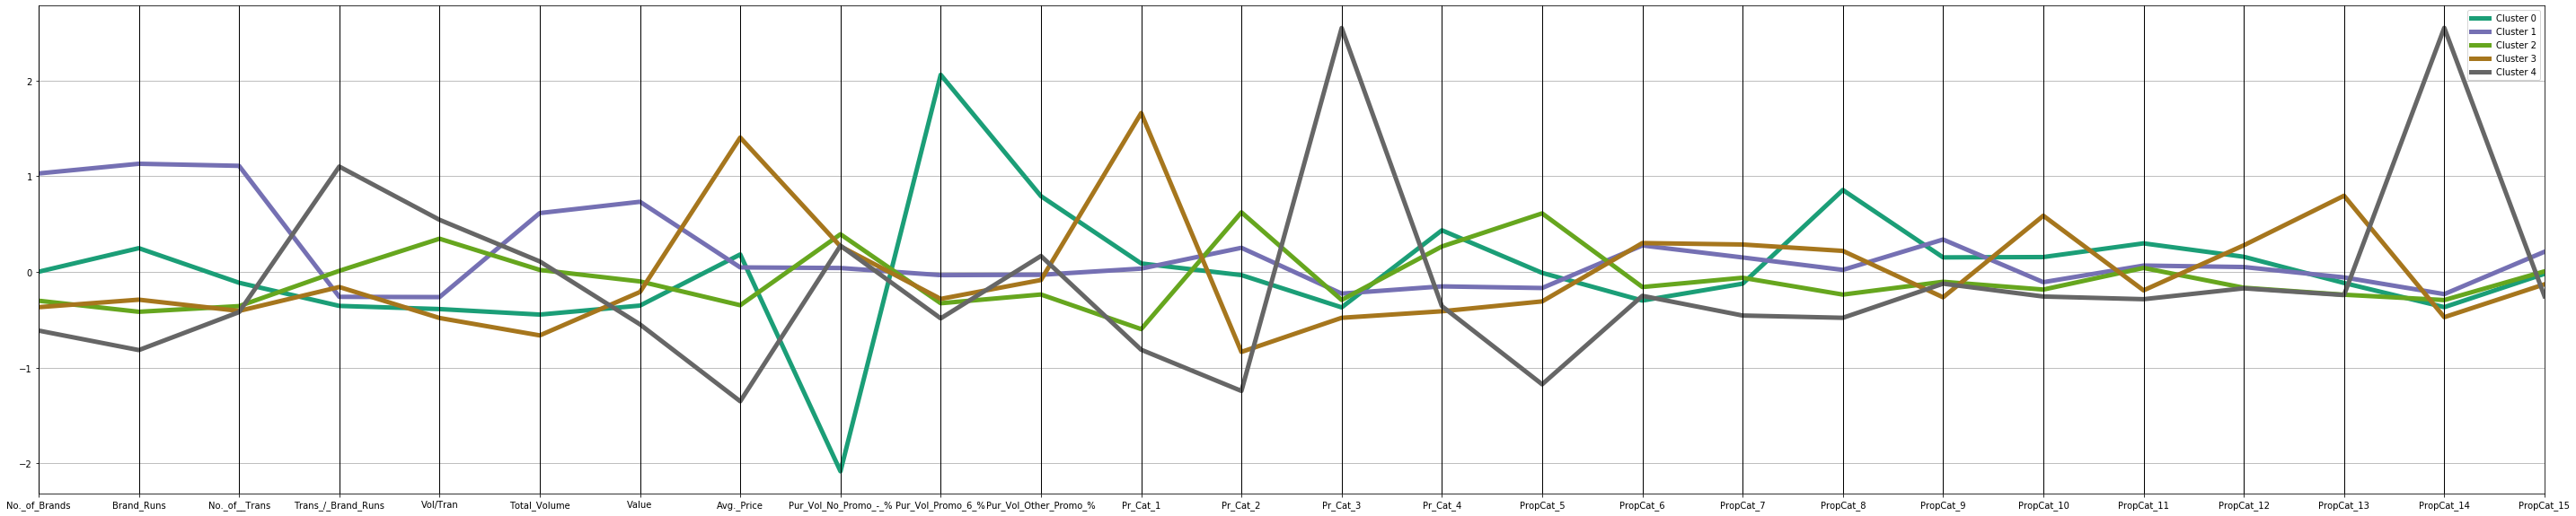

In [95]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(50,10))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
#plt.xlim(-0.5,5.3)
centroids

In [96]:
soap_df4_norm.groupby(kmeans.labels_).mean()

,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,...,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,0.003247,0.249486,-0.111664,-0.353628,-0.386789,-0.444248,-0.350316,0.183849,-2.081450,2.060804,...,-0.297740,-0.121587,0.857196,0.153118,0.156639,0.299814,0.159594,-0.114163,-0.366789,-0.018457
1,1.030000,1.131314,1.109639,-0.258854,-0.261600,0.616106,0.734094,0.048427,0.042316,-0.032167,...,0.278038,0.152362,0.022634,0.339912,-0.105761,0.067704,0.052516,-0.055858,-0.230448,0.212228
2,-0.299691,-0.414982,-0.355992,0.012571,0.348300,0.022425,-0.097918,-0.346509,0.394856,-0.325796,...,-0.156412,-0.059664,-0.235426,-0.101688,-0.182972,0.042911,-0.163842,-0.236680,-0.292649,0.007377
3,-0.367161,-0.288731,-0.405888,-0.156249,-0.479963,-0.661758,-0.208170,1.405228,0.268269,-0.280425,...,0.302896,0.287806,0.220917,-0.263651,0.588518,-0.191186,0.279419,0.797127,-0.471358,-0.127807
4,-0.611397,-0.815194,-0.418525,1.101970,0.545832,0.111116,-0.546809,-1.350195,0.275432,-0.483860,...,-0.248483,-0.454182,-0.477999,-0.121370,-0.255570,-0.283578,-0.170020,-0.240355,2.551395,-0.252102


In [97]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2,3,4
0,0.000000,4.129556,4.198191,4.496906,6.608342
1,4.129556,0.000000,3.186974,4.086572,6.039019
2,4.198191,3.186974,0.000000,3.926685,5.154848
3,4.496906,4.086572,3.926685,0.000000,6.332067
4,6.608342,6.039019,5.154848,6.332067,0.000000


In [98]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    19.432995
1    17.442121
2    16.466699
3    18.842230
4    24.134277
dtype: float64

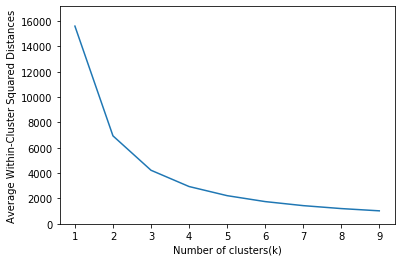

In [99]:
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(soap_df4_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [100]:
# using the 4 clusters for further analysis.
#These 2 lines below helps in re-running the set thats why included otherwise not necessary.
soap_df4=soap_df[['Member_id','No._of_Brands','Brand_Runs','No._of__Trans','Trans_/_Brand_Runs','Vol/Tran',
                  'Total_Volume','Value','Avg._Price','Pur_Vol_No_Promo_-_%','Pur_Vol_Promo_6_%',
                  'Pur_Vol_Other_Promo_%','Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15']]
soap_df4['Member_id']=soap_df4['Member_id'].astype(str)

#Clustering with K-means with 4 clusters
soap_df4.set_index('Member_id', inplace=True)
soap_df4 = soap_df4.apply(lambda x: x.astype('float64'))

# Normalized distance
soap_df4_norm = soap_df4.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=4, random_state=0).fit(soap_df4_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=soap_df4_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))
    


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0 :  1017460, 1025070, 1045030, 1047610, 1047980, 1050210, 1054310, 1060230, 1061130, 1061380, 1061580, 1062270, 1065660, 1075730, 1080470, 1080750, 1081140, 1081640, 1085220, 1085630, 1090040, 1097530, 1100510, 1105370, 1105580, 1106180, 1106290, 1106570, 1110140, 1110290, 1110540, 1111100, 1111280, 1111500, 1116580, 1120550, 1120560, 1120690, 1120870, 1121270, 1121440, 1121450, 1121660, 1125190, 1125480, 1125910, 1134090, 1135240, 1135320, 1137150, 1137580, 1140360, 1140480, 1140500, 1140570, 1140890, 1141020, 1141130, 1145330, 1145390, 1145440, 1145780, 1145960, 1146030, 1146060, 1146240, 1146620, 1146930, 1146970, 1147580, 1147590, 1147850, 1148010, 1148070, 1148330, 1148480, 1150490, 1150910, 1151190, 1151290, 1151460, 1152170, 1152360, 1155150, 1155250, 1155360, 1155460, 1155700, 1155820, 1155870, 1155960, 1156690, 1156770, 1156990, 1157310, 1157360, 1161340, 1161390, 1162260, 1163230, 1163300, 1163560, 1165070, 1165090, 1165310, 1167230
1 :  1010010, 1014190, 1017020, 1017110, 1

In [101]:
soap_df4_norm

,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,...,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
Member_id,,,,,,,,,,,,,,,,,,,,,
1010010,-0.403364,0.120173,-0.410811,-0.464084,-0.324562,-0.501007,-0.588594,-0.439810,0.728635,-0.575827,...,-0.555525,-0.495454,-0.525782,-0.490823,-0.264365,-0.298493,0.829966,-0.261486,-0.021215,3.589688
1010020,0.863748,0.890306,0.508057,-0.391077,-0.264213,0.265360,0.389966,0.052220,-0.215341,0.463901,...,1.532717,-0.358265,-0.420163,-0.262803,-0.264365,0.301536,-0.236478,-0.261486,-0.210590,-0.290201
1014020,0.863748,2.045506,1.828930,-0.352653,-0.194651,1.440672,0.694243,-0.907774,0.239133,-0.366156,...,0.173827,-0.323929,-0.454785,-0.352876,-0.264365,-0.298493,0.380997,-0.261486,1.599587,-0.253104
1014030,-1.036920,-1.131294,-1.559396,-0.621624,-0.161137,-1.341436,-1.386401,-1.132397,0.728635,-0.575827,...,-0.555525,-0.495454,-0.525782,-0.490823,-0.264365,-0.298493,-0.236478,-0.261486,1.743712,-0.290201
1014190,-0.403364,-0.938760,-1.042532,-0.172058,0.898835,-0.465587,-0.845841,-1.260753,-2.500632,0.980286,...,-0.555525,-0.495454,-0.209632,-0.490823,-0.264365,-0.298493,-0.236478,-0.261486,0.030462,-0.290201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,-0.403364,-1.035027,-0.525669,0.684807,-0.019397,-0.372206,-0.135294,0.445310,-1.150725,1.839165,...,-0.555525,-0.495454,-0.525782,-0.490823,0.061132,8.823881,-0.236478,-0.261486,-0.513426,-0.290201
1167230,0.863748,0.697773,-0.181094,-0.537090,-0.944227,-0.884191,-0.551197,1.341127,0.106661,0.223414,...,2.036021,-0.115809,0.448492,-0.490823,0.252706,-0.298493,-0.236478,0.672876,-0.513426,0.275447
1167340,0.230192,0.312706,-0.353381,-0.498666,3.013226,2.213480,2.227245,-0.129617,0.728635,-0.575827,...,0.209542,-0.495454,-0.322892,-0.490823,0.240379,-0.298493,-0.236478,-0.261486,0.165266,-0.290201


In [102]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=soap_df4_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   No._of_Brands  Brand_Runs  No._of__Trans  Trans_/_Brand_Runs  Vol/Tran  \
0         -0.373      -0.262         -0.360              -0.151    -0.479   
1         -0.348      -0.425         -0.382              -0.011     0.367   
2          0.891       1.010          0.871              -0.294    -0.398   
3         -0.584      -0.801         -0.434               1.038     0.514   

   Total_Volume  Value  Avg._Price  Pur_Vol_No_Promo_-_%  Pur_Vol_Promo_6_%  \
0        -0.613 -0.124       1.444                 0.177             -0.177   
1         0.031 -0.084      -0.340                 0.250             -0.247   
2         0.280  0.392       0.114                -0.508              0.590   
3         0.083 -0.556      -1.319                 0.210             -0.436   

   ...  PropCat_6  PropCat_7  PropCat_8  PropCat_9  PropCat_10  PropCat_11  \
0  ...      0.296      0.332      0.113     -0.271       0.699      -0.211   
1  ...     -0.181     -0.075     -0.182     -0.093      -0.187

In [103]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,No._of_Brands,Brand_Runs,No._of__Trans,Trans_/_Brand_Runs,Vol/Tran,Total_Volume,Value,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,...,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,cluster
0,-0.373479,-0.262169,-0.360425,-0.150598,-0.479085,-0.612548,-0.124424,1.444432,0.177310,-0.176849,...,0.331615,0.112995,-0.270855,0.699124,-0.211321,0.368276,0.824813,-0.472842,-0.121051,Cluster 0
1,-0.347928,-0.424937,-0.381857,-0.010996,0.366635,0.031291,-0.083769,-0.340401,0.250155,-0.246975,...,-0.074550,-0.181690,-0.092513,-0.187039,0.095214,-0.155021,-0.238900,-0.308768,-0.006226,Cluster 1
2,0.891294,1.010116,0.870736,-0.293826,-0.397870,0.280317,0.392495,0.113811,-0.508475,0.590031,...,0.079498,0.352968,0.328902,-0.061420,0.083539,0.055808,-0.071772,-0.276102,0.174386,Cluster 2
3,-0.584380,-0.801237,-0.433782,1.038092,0.514269,0.083456,-0.556079,-1.319353,0.210391,-0.436369,...,-0.455526,-0.475972,-0.137204,-0.255947,-0.226035,-0.172868,-0.241261,2.500406,-0.253735,Cluster 3


In [104]:
#fetching cluster numbers sequence wise from grouping with member_id. 
cluster=[]
for key in memb:
    cluster.append(key)
cluster


[1,
 2,
 2,
 3,
 1,
 1,
 1,
 3,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 2,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 0,
 1,
 3,
 0,
 2,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 1,
 0,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 3,
 0,
 3,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 0,
 3,
 1,
 2,
 3,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 2,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 2,
 1,
 1,
 2,
 0,
 1,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 0,
 2,
 2,
 1,
 1,
 3,
 1,
 3,
 0,
 0,
 1,


In [105]:
#Creating a copy of original dataset later on will align with cluster numbers.
soap_df5=soap_df
soap_df5

,Member_id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,2,3,10,2,4,5,5,4,1,...,0.000000,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000
596,1167230,3,3,10,2,3,5,4,4,1,...,0.430693,0.074257,0.148515,0.000000,0.039604,0.000000,0.000000,0.089109,0.000000,0.049505
597,1167340,3,3,17,2,4,4,9,4,1,...,0.127148,0.000000,0.030928,0.000000,0.038660,0.000000,0.000000,0.000000,0.180412,0.000000
598,1167350,2,1,4,2,4,5,2,4,2,...,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027273,0.136364,0.000000


In [106]:
#Aligning the cluster with original dataset.
soap_df5['Cluster']=cluster
soap_df5
#Creating copy for cluster visuals
visuals_clusters=soap_df5

In [107]:
#Step-4
#Creating dummies of all the demographics.
soap_df5 = pd.get_dummies(soap_df5,columns=['SEC','FEH','MT','SEX','AGE','EDU','HS','CHILD','CS'], prefix_sep='_')
soap_df5.columns

Index(['Member_id', 'Affluence_Index', 'No._of_Brands', 'Brand_Runs',
       'Total_Volume', 'No._of__Trans', 'Value', 'Trans_/_Brand_Runs',
       'Vol/Tran', 'Avg._Price', 'Pur_Vol_No_Promo_-_%', 'Pur_Vol_Promo_6_%',
       'Pur_Vol_Other_Promo_%', 'Br._Cd._57,_144', 'Br._Cd._55', 'Br._Cd._272',
       'Br._Cd._286', 'Br._Cd._24', 'Br._Cd._481', 'Br._Cd._352', 'Br._Cd._5',
       'Others_999', 'Pr_Cat_1', 'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4',
       'PropCat_5', 'PropCat_6', 'PropCat_7', 'PropCat_8', 'PropCat_9',
       'PropCat_10', 'PropCat_11', 'PropCat_12', 'PropCat_13', 'PropCat_14',
       'PropCat_15', 'Cluster', 'SEC_1', 'SEC_2', 'SEC_3', 'SEC_4', 'FEH_0',
       'FEH_1', 'FEH_2', 'FEH_3', 'MT_0', 'MT_3', 'MT_4', 'MT_5', 'MT_6',
       'MT_8', 'MT_9', 'MT_10', 'MT_12', 'MT_13', 'MT_14', 'MT_15', 'MT_16',
       'MT_17', 'MT_19', 'SEX_0', 'SEX_1', 'SEX_2', 'AGE_1', 'AGE_2', 'AGE_3',
       'AGE_4', 'EDU_0', 'EDU_1', 'EDU_2', 'EDU_3', 'EDU_4', 'EDU_5', 'EDU_6',
       'EDU_7', 'E

In [108]:
#Cluster 1
cluster1=soap_df5.loc[soap_df5['Cluster'] ==0]
cluster1

,Member_id,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg._Price,...,HS_12,HS_15,CHILD_1,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_0,CS_1,CS_2
9,1017460,6,4,13,7455,18,990.5,1.38,414.17,13.29,...,0,0,0,0,0,1,0,0,1,0
19,1025070,0,2,4,675,4,123.5,1.00,168.75,18.30,...,0,0,0,0,0,0,1,1,0,0
75,1045030,19,3,19,4650,25,619.0,1.32,186.00,13.31,...,0,0,1,0,0,0,0,0,1,0
83,1047610,11,3,15,7125,33,1196.0,2.20,215.91,16.79,...,0,0,0,0,0,1,0,1,0,0
88,1047980,0,1,1,150,1,37.0,1.00,150.00,24.67,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,1163560,16,2,11,2000,17,443.0,1.55,117.65,22.15,...,0,0,0,0,0,1,0,0,1,0
577,1165070,15,5,13,7975,23,961.5,1.77,346.74,12.06,...,0,0,0,1,0,0,0,0,1,0
578,1165090,22,4,15,5800,19,1046.0,1.27,305.26,18.03,...,0,0,0,0,0,1,0,0,1,0
581,1165310,25,4,22,4725,26,711.5,1.18,181.73,15.06,...,0,0,0,0,0,1,0,0,1,0


In [109]:
#Cluster 1 Descriptive stats
pd.options.display.max_columns = None
cluster1.describe()


,Member_id,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br._Cd._57,_144",Br._Cd._55,Br._Cd._272,Br._Cd._286,Br._Cd._24,Br._Cd._481,Br._Cd._352,Br._Cd._5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Cluster,SEC_1,SEC_2,SEC_3,SEC_4,FEH_0,FEH_1,FEH_2,FEH_3,MT_0,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_0,SEX_1,SEX_2,AGE_1,AGE_2,AGE_3,AGE_4,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_0,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_1,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_0,CS_1,CS_2
count,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.0,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.0,106.0,106.0,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,1.124617e+06,18.518868,3.047170,13.028302,7159.009434,24.877358,1227.592453,2.225849,295.972736,17.236321,0.934177,0.037069,0.028754,0.153073,0.010556,0.024428,0.008832,0.078752,0.007733,0.011929,0.048462,0.656445,0.757954,0.220613,0.010825,0.010608,0.358124,0.141462,0.161772,0.097373,0.013806,0.073796,0.008576,0.015899,0.103599,0.010788,0.014804,0.0,0.518868,0.245283,0.198113,0.037736,0.226415,0.283019,0.047170,0.443396,0.226415,0.028302,0.113208,0.047170,0.028302,0.018868,0.018868,0.424528,0.0,0.018868,0.0,0.028302,0.028302,0.018868,0.0,0.226415,0.028302,0.745283,0.018868,0.235849,0.292453,0.452830,0.226415,0.0,0.009434,0.009434,0.103774,0.339623,0.047170,0.226415,0.037736,0.0,0.226415,0.0,0.094340,0.179245,0.235849,0.179245,0.066038,0.009434,0.0,0.009434,0.0,0.0,0.0,0.075472,0.169811,0.103774,0.424528,0.226415,0.245283,0.726415,0.028302
std,3.609657e+04,13.793878,1.319322,7.272201,5125.841739,14.414082,922.648303,1.963514,134.714577,3.940387,0.096000,0.082052,0.054340,0.229048,0.043480,0.057783,0.034642,0.173448,0.021755,0.052416,0.144294,0.284145,0.186386,0.184880,0.043711,0.033645,0.304692,0.237985,0.282755,0.174281,0.040251,0.163294,0.022651,0.055718,0.204522,0.043719,0.045438,0.0,0.502017,0.432299,0.400471,0.191462,0.420499,0.452606,0.213009,0.499146,0.420499,0.166622,0.318352,0.213009,0.166622,0.136705,0.136705,0.496619,0.0,0.136705,0.0,0.166622,0.166622,0.136705,0.0,0.420499,0.166622,0.437772,0.136705,0.426545,0.457050,0.500135,0.420499,0.0,0.097129,0.097129,0.306415,0.475831,0.213009,0.420499,0.191462,0.0,0.420499,0.0,0.293689,0.385380,0.426545,0.385380,0.249528,0.097129,0.0,0.097129,0.0,0.0,0.0,0.265406,0.377251,0.306415,0.496619,0.420499,0.432299,0.447916,0.166622
min,1.017460e+06,0.000000,1.000000,1.000000,150.000000,1.000000,20.000000,1.000000,117.650000,10.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [110]:
#Cluster 2
cluster2=soap_df5.loc[soap_df5['Cluster'] ==1]
cluster2

,Member_id,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br._Cd._57,_144",Br._Cd._55,Br._Cd._272,Br._Cd._286,Br._Cd._24,Br._Cd._481,Br._Cd._352,Br._Cd._5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Cluster,SEC_1,SEC_2,SEC_3,SEC_4,FEH_0,FEH_1,FEH_2,FEH_3,MT_0,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_0,SEX_1,SEX_2,AGE_1,AGE_2,AGE_3,AGE_4,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_0,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_1,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_0,CS_1,CS_2
0,1010010,2,3,17,8025,24,818.00,1.41,334.38,10.19,1.000000,0.000000,0.000000,0.376947,0.130841,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1014190,10,3,6,8300,13,591.00,2.17,638.46,7.12,0.614458,0.144578,0.240964,0.048193,0.144578,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,1017020,13,3,26,18175,41,1705.50,1.58,443.29,9.38,1.000000,0.000000,0.000000,0.077029,0.066025,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.856946,0.215956,0.449794,0.066025,0.268226,0.486933,0.099037,0.000000,0.006878,0.071527,0.000000,0.000000,0.000000,0.000000,0.066025,0.269601,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,1017110,11,4,17,9950,26,1007.50,1.53,382.69,10.13,0.977387,0.022613,0.000000,0.452261,0.045226,0.007538,0.000000,0.000000,0.000000,0.000000,0.0,0.494975,0.067839,0.658291,0.045226,0.228643,0.821608,0.000000,0.022613,0.007538,0.000000,0.000000,0.000000,0.000000,0.000000,0.045226,0.103015,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,1017360,17,2,12,26490,27,3113.50,2.25,981.11,11.75,0.898075,0.101925,0.000000,0.385051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.614949,0.108154,0.891846,0.000000,0.000000,0.704606,0.280294,0.000000,0.000000,0.015100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1166980,25,4,13,5300,28,676.50,2.15,189.29,12.76,1.000000,0.000000,0.000000,0.636792,0.000000,0.000000,0.000000,0.000000,0.028302,0.037736,0.0,0.297170,0.259434,0.702830,0.000000,0.037736,0.764151,0.127358,0.051887,0.000000,0.000000,0.028302,0.028302,0.000000,0.000000,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
595,1167090,15,3,5,9025,22,1218.00,4.40,410.23,13.50,0.775623,0.224377,0.000000,0.044321,0.000000,0.000000,0.000000,0.000000,0.897507,0.000000,0.0,0.058172,0.058172,0.941828,0.000000,0.000000,0.077562,0.000000,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,1,

In [111]:
#Cluster 2 Descriptive Stats
pd.options.display.max_columns = None
cluster2.describe()

,Member_id,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br._Cd._57,_144",Br._Cd._55,Br._Cd._272,Br._Cd._286,Br._Cd._24,Br._Cd._481,Br._Cd._352,Br._Cd._5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Cluster,SEC_1,SEC_2,SEC_3,SEC_4,FEH_0,FEH_1,FEH_2,FEH_3,MT_0,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_0,SEX_1,SEX_2,AGE_1,AGE_2,AGE_3,AGE_4,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_0,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_1,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_0,CS_1,CS_2
count,2.400000e+02,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.0,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,1.099995e+06,15.654167,3.08750,11.337500,12157.708333,24.504167,1263.466667,2.589167,506.179708,10.561750,0.942874,0.030554,0.026572,0.269659,0.047850,0.023032,0.05569,0.001683,0.033481,0.049556,0.006131,0.512643,0.122703,0.664869,0.056984,0.155445,0.649785,0.062226,0.082327,0.052452,0.024999,0.005923,0.038735,0.002142,0.002154,0.054403,0.024853,1.0,0.175000,0.229167,0.291667,0.304167,0.100000,0.283333,0.058333,0.558333,0.100000,0.008333,0.145833,0.041667,0.025000,0.004167,0.012500,0.550000,0.012500,0.016667,0.004167,0.008333,0.008333,0.058333,0.004167,0.100000,0.037500,0.862500,0.020833,0.216667,0.300000,0.462500,0.100000,0.108333,0.016667,0.070833,0.270833,0.295833,0.029167,0.079167,0.020833,0.008333,0.100000,0.008333,0.070833,0.108333,0.23750,0.233333,0.12500,0.037500,0.041667,0.020833,0.008333,0.004167,0.004167,0.087500,0.283333,0.112500,0.416667,0.100000,0.154167,0.729167,0.116667
std,4.537711e+04,9.962334,1.18421,5.501488,7971.466201,10.219351,845.166053,1.904272,296.707277,1.673497,0.099726,0.058752,0.082762,0.289463,0.096758,0.082314,0.16393,0.008239,0.122460,0.173290,0.022179,0.302000,0.121798,0.287255,0.106326,0.263586,0.296607,0.140085,0.201967,0.124379,0.060028,0.021150,0.135806,0.007931,0.009102,0.102653,0.104243,0.0,0.380761,0.421175,0.455480,0.461015,0.300627,0.451559,0.234862,0.497623,0.300627,0.091096,0.353677,0.200244,0.156451,0.064550,0.111335,0.498533,0.111335,0.128287,0.064550,0.091096,0.091096,0.234862,0.064550,0.300627,0.190381,0.345094,0.143125,0.412835,0.459215,0.499634,0.300627,0.311450,0.128287,0.257082,0.445319,0.457370,0.168625,0.270563,0.143125,0.091096,0.300627,0.091096,0.257082,0.311450,0.42644,0.423836,0.33141,0.190381,0.200244,0.143125,0.091096,0.064550,0.064550,0.283157,0.451559,0.316641,0.494037,0.300627,0.361863,0.445319,0.321694
min,1.010010e+06,0.000000,1.00000,1.000000,300.000000,1.000000,30.000000,1.000000,144.170000,6.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [112]:
#Cluster 3
cluster3=soap_df5.loc[soap_df5['Cluster'] ==2]
cluster3

,Member_id,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br._Cd._57,_144",Br._Cd._55,Br._Cd._272,Br._Cd._286,Br._Cd._24,Br._Cd._481,Br._Cd._352,Br._Cd._5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Cluster,SEC_1,SEC_2,SEC_3,SEC_4,FEH_0,FEH_1,FEH_2,FEH_3,MT_0,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_0,SEX_1,SEX_2,AGE_1,AGE_2,AGE_3,AGE_4,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_0,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_1,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_0,CS_1,CS_2
1,1010020,19,5,25,13975,40,1681.50,1.60,349.38,12.03,0.887299,0.096601,0.016100,0.021467,0.075134,0.000000,0.000000,0.000000,0.059034,0.000000,0.144902,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1014020,23,5,37,23100,63,1950.00,1.70,366.67,8.44,0.941558,0.019481,0.038961,0.025974,0.545455,0.000000,0.030303,0.000000,0.000000,0.000000,0.019481,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10,1017490,30,4,24,16275,42,1555.50,1.75,387.50,9.56,0.817204,0.173579,0.009217,0.024578,0.000000,0.000000,0.000000,0.004608,0.027650,0.000000,0.000000,0.943164,0.244240,0.153610,0.000000,0.602151,0.786482,0.000000,0.119816,0.000000,0.036866,0.006144,0.027650,0.000000,0.004608,0.000000,0.018433,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11,1020070,18,4,21,13875,61,1547.75,2.90,227.46,11.15,0.989189,0.010811,0.000000,0.340541,0.075676,0.000000,0.000000,0.000000,0.000000,0.064865,0.000000,0.518919,0.407207,0.517117,0.075676,0.000000,0.441441,0.000000,0.421622,0.000000,0.043243,0.000000,0.000000,0.000000,0.000000,0.075676,0.018018,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
16,1024220,11,7,28,19150,38,1914.00,1.36,503.95,9.99,0.886423,0.050914,0.062663,0.083551,0.109661,0.093995,0.093995,0.000000,0.000000,0.031332,0.023499,0.563969,0.093995,0.616188,0.109661,0.180157,0.490862,0.023499,0.070496,0.117493,0.031332,0.000000,0.000000,0.000000,0.000000,0.109661,0.156658,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,1165720,31,6,38,9600,48,1185.00,1.26,200.00,12.34,0.601562,0.382812,0.015625,0.192708,0.015625,0.101562,0.000000,0.000000,0.101562,0.052083,0.000000,0.536458,0.242188,0.635417,0.015625,0.106771,0.390625,0.010417,0.052083,0.239583,0.020833,0.046875,0.101562,0.000000,0.000000,0.015625,0.122396,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
586,1166020,26,4,41,22085,61,2611.00,1.49,362.05,11.82,0.878877,0.047544,0.073579,0.563731,0.000000,0.000000,0.000000,0.000000,0.016980,0.000000,0.013584,0.405705,0.215531,0.725606,0.018112,0.040752,0.762961,0.031696,0.097351,0.010188,0.000000,0.009056,0.016980,0.03735

In [113]:
#Cluster 3 Descriptive stats
pd.options.display.max_columns = None
cluster3.describe()

,Member_id,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br._Cd._57,_144",Br._Cd._55,Br._Cd._272,Br._Cd._286,Br._Cd._24,Br._Cd._481,Br._Cd._352,Br._Cd._5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Cluster,SEC_1,SEC_2,SEC_3,SEC_4,FEH_0,FEH_1,FEH_2,FEH_3,MT_0,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_0,SEX_1,SEX_2,AGE_1,AGE_2,AGE_3,AGE_4,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_0,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_1,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_0,CS_1,CS_2
count,1.840000e+02,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0,184.000000,184.0,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,1.113781e+06,21.163043,5.043478,26.244565,14091.125000,46.315217,1683.731848,1.853098,316.159022,12.260326,0.852301,0.108320,0.039379,0.141401,0.057842,0.061941,0.030685,0.014707,0.033750,0.039583,0.020372,0.599719,0.292244,0.570851,0.065940,0.070965,0.400531,0.118954,0.112459,0.133954,0.051449,0.015544,0.037586,0.007684,0.018093,0.063086,0.040660,2.0,0.277174,0.315217,0.244565,0.163043,0.032609,0.315217,0.059783,0.592391,0.032609,0.0,0.168478,0.043478,0.010870,0.027174,0.021739,0.592391,0.021739,0.010870,0.010870,0.010870,0.010870,0.038043,0.0,0.027174,0.038043,0.934783,0.032609,0.168478,0.244565,0.554348,0.038043,0.038043,0.016304,0.043478,0.228261,0.402174,0.059783,0.152174,0.021739,0.0,0.027174,0.0,0.059783,0.119565,0.304348,0.239130,0.119565,0.048913,0.027174,0.027174,0.010870,0.005435,0.010870,0.135870,0.239130,0.103261,0.494565,0.027174,0.076087,0.847826,0.076087
std,4.345179e+04,10.700367,1.405789,10.198573,7730.232024,18.459188,898.462967,0.735601,149.480918,2.039203,0.139546,0.121611,0.057550,0.144621,0.113864,0.120233,0.066440,0.029153,0.073231,0.080737,0.036256,0.212749,0.177561,0.204196,0.119491,0.125524,0.214258,0.160051,0.141869,0.178570,0.074093,0.035323,0.079243,0.017287,0.034068,0.118238,0.095586,0.0,0.448824,0.465870,0.431002,0.370413,0.178095,0.465870,0.237731,0.492730,0.178095,0.0,0.375312,0.204488,0.103972,0.163034,0.146228,0.492730,0.146228,0.103972,0.103972,0.103972,0.103972,0.191823,0.0,0.163034,0.191823,0.247583,0.178095,0.375312,0.431002,0.498394,0.191823,0.191823,0.126989,0.204488,0.420857,0.491675,0.237731,0.360169,0.146228,0.0,0.163034,0.0,0.237731,0.325338,0.461386,0.427716,0.325338,0.216275,0.163034,0.163034,0.103972,0.073721,0.103972,0.343585,0.427716,0.305130,0.501335,0.163034,0.265861,0.360169,0.265861
min,1.010020e+06,0.000000,2.000000,6.000000,3275.000000,13.000000,392.500000,1.030000,94.430000,7.010000,0.327189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009091,0.000000,0.040519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [114]:
#Cluster 4
cluster4=soap_df5.loc[soap_df5['Cluster'] ==3]
cluster4

,Member_id,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br._Cd._57,_144",Br._Cd._55,Br._Cd._272,Br._Cd._286,Br._Cd._24,Br._Cd._481,Br._Cd._352,Br._Cd._5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Cluster,SEC_1,SEC_2,SEC_3,SEC_4,FEH_0,FEH_1,FEH_2,FEH_3,MT_0,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_0,SEX_1,SEX_2,AGE_1,AGE_2,AGE_3,AGE_4,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_0,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_1,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_0,CS_1,CS_2
3,1014030,0,2,4,1500,4,114.0,1.00,375.00,7.60,1.000000,0.000000,0.000000,0.400000,0.600000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.600000,0.000000,3,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
7,1017160,0,3,8,9300,25,569.5,3.13,372.00,6.12,0.935484,0.000000,0.064516,0.043011,0.790323,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.040323,0.043011,0.895161,0.021505,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008065,0.0,0.895161,0.032258,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
20,1025140,0,2,4,6400,8,368.0,2.00,800.00,5.75,0.578125,0.000000,0.421875,0.000000,0.937500,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.937500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.937500,0.000000,3,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
21,1025210,4,3,3,7550,26,434.0,8.67,290.38,5.75,0.960265,0.000000,0.039735,0.013245,0.973510,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.013245,0.000000,0.013245,0.973510,0.013245,0.026490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.973510,0.000000,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
22,1027040,11,3,4,32000,27,1864.0,6.75,1185.19,5.83,0.946094,0.007031,0.046875,0.000000,0.984375,0.0,0.000000,0.0,0.007031,0.000000,0.000000,0.008594,0.008594,0.007031,0.984375,0.000000,0.004687,0.000000,0.000000,0.000000,0.000000,0.003906,0.007031,0.000000,0.0,0.984375,0.000000,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,1125840,18,2,11,14050,18,1031.5,1.64,780.56,7.34,0.967972,0.000000,0.032028,0.000000,0.544484,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.455516,0.000000,0.327402,0.672598,0.000000,0.071174,0.341637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.587189,0.000000,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
500,1156220,0,4,15,10825,25,819.5,1.67,433.00,7.57,1.000000,0.000000,0.000000,0.000000,0.692841,0.0,0.036952,0.0,0.000000,0.009238,0.000000,0.260970,0.159353,0.147806,0.692841,0.000000,0.046189,0.064665,0.140878,0.000000,0.055427,0.000000,0.000000,0.000000,0.0,0.692841,0.000000,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [115]:
#Cluster 4 Descriptive stats
pd.options.display.max_columns = None
cluster4.describe()

,Member_id,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br._Cd._57,_144",Br._Cd._55,Br._Cd._272,Br._Cd._286,Br._Cd._24,Br._Cd._481,Br._Cd._352,Br._Cd._5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Cluster,SEC_1,SEC_2,SEC_3,SEC_4,FEH_0,FEH_1,FEH_2,FEH_3,MT_0,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_0,SEX_1,SEX_2,AGE_1,AGE_2,AGE_3,AGE_4,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_0,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_1,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_0,CS_1,CS_2
count,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.0,70.0,70.0,70.000000,70.0,70.0,70.0,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.0,70.0,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000
mean,1.062412e+06,8.542857,2.714286,7.428571,12562.714286,23.600000,846.691429,5.319429,542.874714,6.900857,0.938127,0.012957,0.048916,0.047594,0.776607,0.005417,0.006014,0.001929,0.006978,0.001400,0.007927,0.146134,0.055106,0.112784,0.808084,0.024026,0.095585,0.051105,0.007810,0.007593,0.022194,0.000645,0.007129,0.001672,0.001929,0.801147,0.003192,3.0,0.028571,0.157143,0.200000,0.614286,0.214286,0.128571,0.057143,0.600000,0.214286,0.0,0.071429,0.057143,0.0,0.0,0.0,0.571429,0.0,0.0,0.0,0.014286,0.042857,0.028571,0.0,0.214286,0.028571,0.757143,0.028571,0.300000,0.300000,0.371429,0.257143,0.228571,0.014286,0.100000,0.257143,0.114286,0.0,0.028571,0.0,0.0,0.214286,0.0,0.042857,0.085714,0.128571,0.328571,0.085714,0.042857,0.042857,0.028571,0.0,0.0,0.0,0.071429,0.214286,0.057143,0.442857,0.214286,0.314286,0.50000,0.185714
std,3.481140e+04,8.037387,1.092038,5.839822,7588.164014,13.028842,508.691926,5.461766,228.197696,1.269064,0.097830,0.041359,0.086299,0.094969,0.180251,0.038369,0.024259,0.009846,0.034671,0.006541,0.033502,0.145292,0.091421,0.121902,0.163437,0.069758,0.125357,0.087170,0.021113,0.038715,0.054543,0.003037,0.034663,0.006869,0.009846,0.166478,0.017231,0.0,0.167802,0.366563,0.402888,0.490278,0.413289,0.337142,0.233791,0.493435,0.413289,0.0,0.259399,0.233791,0.0,0.0,0.0,0.498445,0.0,0.0,0.0,0.119523,0.203997,0.167802,0.0,0.413289,0.167802,0.431906,0.167802,0.461566,0.461566,0.486675,0.440215,0.422944,0.119523,0.302166,0.440215,0.320455,0.0,0.167802,0.0,0.0,0.413289,0.0,0.203997,0.281963,0.337142,0.473085,0.281963,0.203997,0.203997,0.167802,0.0,0.0,0.0,0.259399,0.413289,0.233791,0.500310,0.413289,0.467583,0.50361,0.391684
min,1.014030e+06,0.000000,1.000000,1.000000,750.000000,2.000000,51.000000,1.000000,180.000000,5.620000,0.578125,0.000000,0.000000,0.000000,0.305085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.478261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.478261,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [116]:
visual_cluster1=visuals_clusters.loc[visuals_clusters['Cluster'] ==0]

In [117]:
visual_cluster1.describe()

,Member_id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br._Cd._57,_144",Br._Cd._55,Br._Cd._272,Br._Cd._286,Br._Cd._24,Br._Cd._481,Br._Cd._352,Br._Cd._5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Cluster
count,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0
mean,1.124617e+06,1.754717,1.707547,6.952830,1.518868,3.179245,4.330189,3.113208,3.556604,0.783019,18.518868,3.047170,13.028302,7159.009434,24.877358,1227.592453,2.225849,295.972736,17.236321,0.934177,0.037069,0.028754,0.153073,0.010556,0.024428,0.008832,0.078752,0.007733,0.011929,0.048462,0.656445,0.757954,0.220613,0.010825,0.010608,0.358124,0.141462,0.161772,0.097373,0.013806,0.073796,0.008576,0.015899,0.103599,0.010788,0.014804,0.0
std,3.609657e+04,0.903025,1.249510,4.856772,0.842119,0.859647,2.606664,2.048557,1.227310,0.478185,13.793878,1.319322,7.272201,5125.841739,14.414082,922.648303,1.963514,134.714577,3.940387,0.096000,0.082052,0.054340,0.229048,0.043480,0.057783,0.034642,0.173448,0.021755,0.052416,0.144294,0.284145,0.186386,0.184880,0.043711,0.033645,0.304692,0.237985,0.282755,0.174281,0.040251,0.163294,0.022651,0.055718,0.204522,0.043719,0.045438,0.0
min,1.017460e+06,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,150.000000,1.000000,20.000000,1.000000,117.650000,10.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.106360e+06,1.000000,1.000000,3.250000,1.250000,2.250000,4.000000,2.000000,3.000000,1.000000,6.500000,2.000000,7.250000,4168.750000,15.250000,591.250000,1.235000,211.692500,14.847500,0.894666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497056,0.613867,0.046350,0.000000,0.000000,0.068636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.140490e+06,1.000000,1.000000,10.000000,2.000000,3.000000,5.000000,3.500000,4.000000,1.000000,19.000000,3.000000,13.000000,6612.500000,24.000000,1089.375000,1.720000,269.525000,16.705000,0.969085,0.000000,0.000000,0.042339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700724,0.770361,0.192213,0.000000,0.000000,0.326118,0.014691,0.012183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.151265e+06,2.000000,3.000000,10.000000,2.000000,4.000000,7.000000,5.000000,4.000000,1.000000,30.000000,4.000000,18.000000,9200.000000,32.000000,1696.625000,2.297500,343.062500,19.160000,1.000000,0.047669,0.040551,0.210467,0.000000,0.014111,0.000000,0.095263,0.000000,0.000000,0.021203,0.908524,0.925317,0.365030,0.000000,0.000000,0.610845,0.189895,0.170917,0.118386,0.000000,0.069629,0.000000,0.000000,0.112153,0.000000,0.000000,0.0
max,1.167230e+06,4.000000,3.000000,17.000000,2.000000,4.000000,8.000000,9.000000,5.000000,2.000000,53.000000,7.000000,30.000000,31125.000000,65.000000,6365.000000,15.000000,797.660000,33.330000,1.000000,0.666667,0.285132,1.000000,0.314754,0.315789,0.238806,1.000000,0.142857,0.395604,0.971098,1.000000,1.000000,0.630631,0.314754,0.182353,1.000000,0.971098,1.000000,0.79274

No handles with labels found to put in legend.


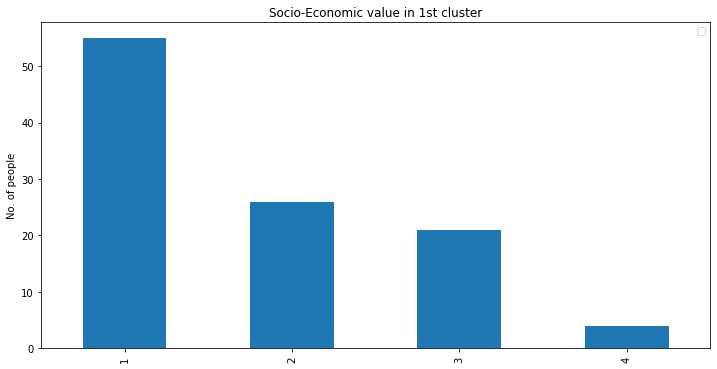

In [118]:
#Visualization of cluster 1
SEC = visual_cluster1['SEC'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('No. of people')
plt.legend()
plt.title('Socio-Economic value in 1st cluster')
SEC.plot(kind='bar')
plt.show()
# we can see that 1st cluster has most people with high socio-economic value. where 1 defines the highest.

No handles with labels found to put in legend.


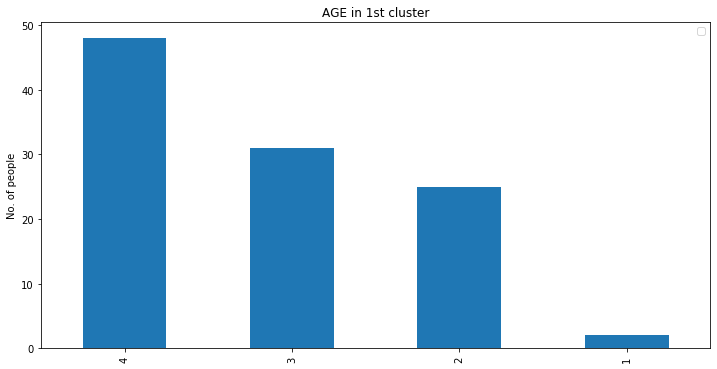

In [119]:
#Age patterns in Cluster1
AGE = visual_cluster1['AGE'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('No. of people')
plt.legend()
plt.title('AGE in 1st cluster')
AGE.plot(kind='bar')
plt.show()
# The 4th category of age is most in cluster1.

No handles with labels found to put in legend.


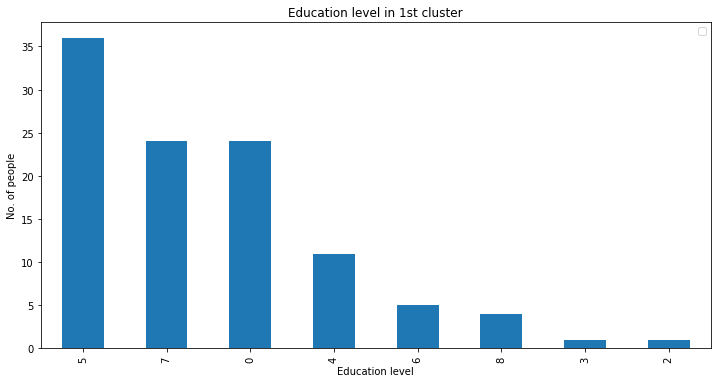

In [120]:
EDU = visual_cluster1['EDU'].value_counts()
plt.figure(figsize=(12,6))
plt.xlabel('Education level')
plt.ylabel('No. of people')
plt.legend()
plt.title('Education level in 1st cluster')
EDU.plot(kind='bar')
plt.show()
# Here, we can see the cluster 1 people have above average level of education and we can ignore the 0 because it is not even a given scale.

No handles with labels found to put in legend.


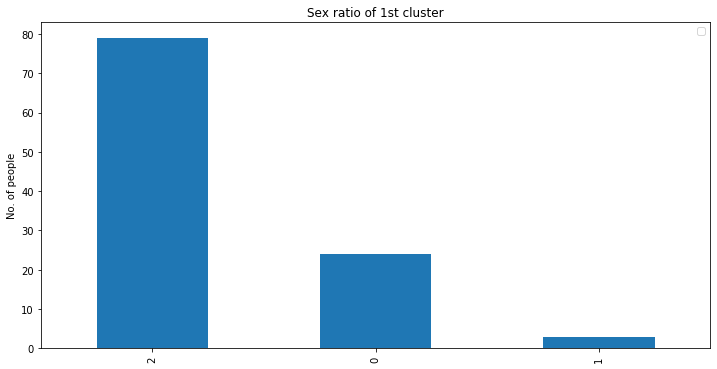

In [121]:
#SEX ratio in Cluster1
SEX = visual_cluster1['SEX'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('No. of people')
plt.legend()
plt.title('Sex ratio of 1st cluster')
SEX.plot(kind='bar')
plt.show()
# Nearly 80% of females are in 1st cluster. Where, 2 = Female and 1 = Male.

In [122]:
#Visuals for Cluster 4
visual_cluster4=visuals_clusters.loc[visuals_clusters['Cluster'] ==3]

In [123]:
visual_cluster4.describe()

,Member_id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index,No._of_Brands,Brand_Runs,Total_Volume,No._of__Trans,Value,Trans_/_Brand_Runs,Vol/Tran,Avg._Price,Pur_Vol_No_Promo_-_%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,"Br._Cd._57,_144",Br._Cd._55,Br._Cd._272,Br._Cd._286,Br._Cd._24,Br._Cd._481,Br._Cd._352,Br._Cd._5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,Cluster
count,7.000000e+01,70.00000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,1.062412e+06,3.40000,2.042857,7.671429,1.542857,3.014286,2.357143,3.914286,3.514286,0.871429,8.542857,2.714286,7.428571,12562.714286,23.600000,846.691429,5.319429,542.874714,6.900857,0.938127,0.012957,0.048916,0.047594,0.776607,0.005417,0.006014,0.001929,0.006978,0.001400,0.007927,0.146134,0.055106,0.112784,0.808084,0.024026,0.095585,0.051105,0.007810,0.007593,0.022194,0.000645,0.007129,0.001672,0.001929,0.801147,0.003192,3.0
std,3.481140e+04,0.85804,1.267609,4.862520,0.828579,0.892689,2.014698,2.494881,1.248104,0.700340,8.037387,1.092038,5.839822,7588.164014,13.028842,508.691926,5.461766,228.197696,1.269064,0.097830,0.041359,0.086299,0.094969,0.180251,0.038369,0.024259,0.009846,0.034671,0.006541,0.033502,0.145292,0.091421,0.121902,0.163437,0.069758,0.125357,0.087170,0.021113,0.038715,0.054543,0.003037,0.034663,0.006869,0.009846,0.166478,0.017231,0.0
min,1.014030e+06,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,750.000000,2.000000,51.000000,1.000000,180.000000,5.620000,0.578125,0.000000,0.000000,0.000000,0.305085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.478261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.478261,0.000000,3.0
25%,1.035588e+06,3.00000,1.000000,4.000000,2.000000,2.000000,0.250000,2.250000,2.000000,0.000000,2.000000,2.000000,3.000000,6506.250000,14.250000,399.750000,2.030000,379.517500,5.850000,0.913543,0.000000,0.000000,0.000000,0.622336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021432,0.000000,0.000000,0.687930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.673723,0.000000,3.0
50%,1.060570e+06,4.00000,3.000000,10.000000,2.000000,3.000000,2.500000,5.000000,4.000000,1.000000,8.000000,3.000000,5.000000,11975.000000,24.500000,834.750000,3.240000,513.500000,6.675000,0.982870,0.000000,0.000000,0.000000,0.793020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110703,0.010408,0.062516,0.837620,0.000000,0.043746,0.008895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817808,0.000000,3.0
75%,1.081642e+06,4.00000,3.000000,10.000000,2.000000,4.000000,4.000000,5.000000,4.000000,1.000000,12.750000,3.000000,11.000000,17437.500000,28.750000,1228.375000,5.875000,705.355000,7.530000,1.000000,0.000000,0.061920,0.040187,0.940257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225565,0.078886,0.186328,0.961243,0.010813,0.144106,0.062616,0.006284,0.000000,0.011563,0.000000,0.000000,0.000000,0.000000,0.955740,0.000000,3.0
max,1.163830e+06,4.00000,3.000000,17.000000,2.000000,4.000000,7.000000,9.000000,5.000000,2.000000,49.000000,6.000000,26.000000,32000.000000,69.000000,2121.500000,23.000000,1185.190000,11.600000,1.000000,0.269287,0.421875,0.400000,1.000000,0.318584,0.143820,0.077453,0.239130,0.040268,0.263948,0.593220,0.491416,0.413043,1.000000,0.333333,0.467290,0.459227,0.140878,0.318584,0.303030,0.019149,0.239130,0.051095,0.077453,1.000000,0.1391

No handles with labels found to put in legend.


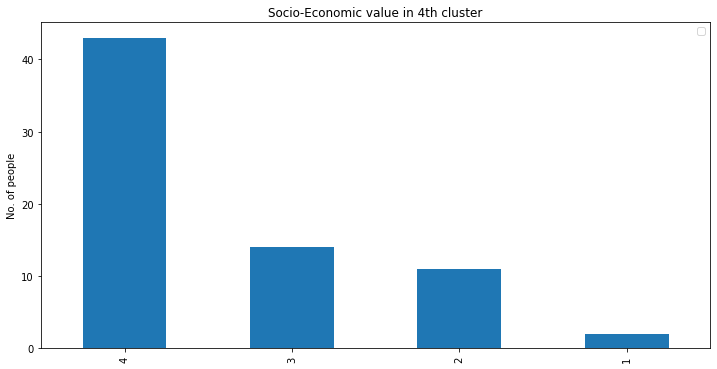

In [124]:
#Visualization of cluster 4
SEC = visual_cluster4['SEC'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('No. of people')
plt.legend()
plt.title('Socio-Economic value in 4th cluster')
SEC.plot(kind='bar')
plt.show()
# we can see that 4th cluster has most people with low socio-economic value. where 1 defines the highest.

No handles with labels found to put in legend.


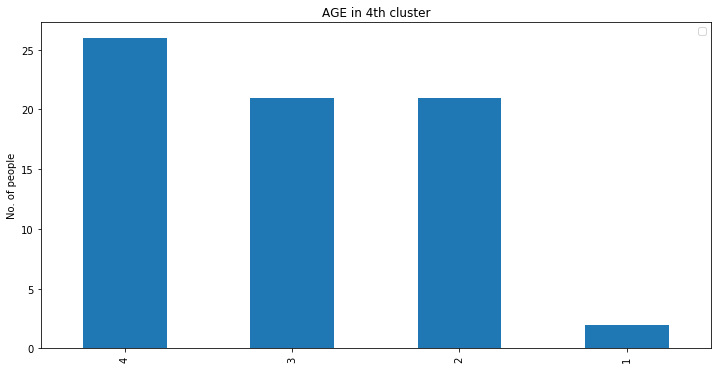

In [125]:
#Age patterns in Cluster4
AGE = visual_cluster4['AGE'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('No. of people')
plt.legend()
plt.title('AGE in 4th cluster')
AGE.plot(kind='bar')
plt.show()
# The 4th category of age is most in cluster4 but 2nd and 3rd category also has considerable volume.

No handles with labels found to put in legend.


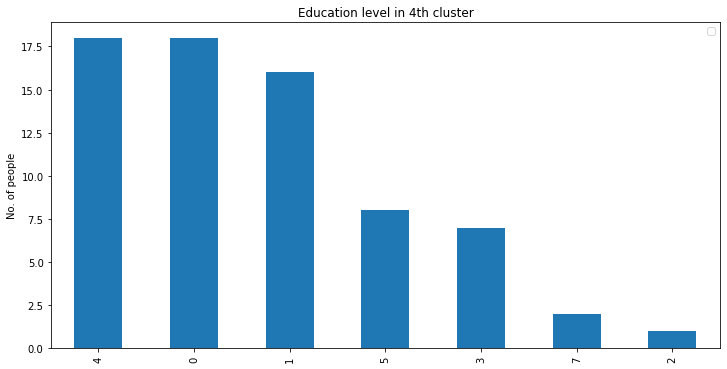

In [126]:
EDU = visual_cluster4['EDU'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('No. of people')
plt.legend()
plt.title('Education level in 4th cluster')
EDU.plot(kind='bar')
plt.show()
# Here, we can see the cluster 4 people have below average level of education and we can ignore the 0 because it is not even a given scale.

No handles with labels found to put in legend.


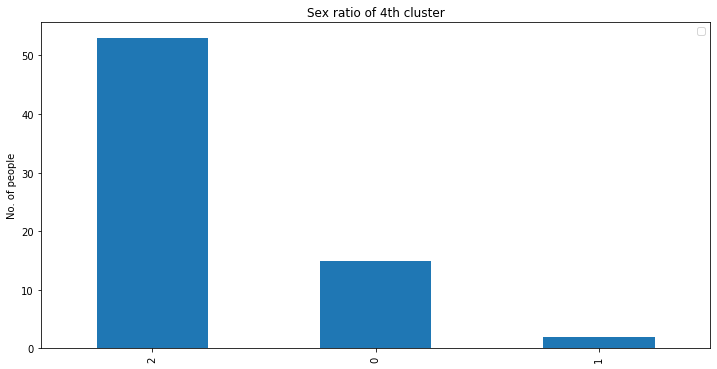

In [127]:
#SEX ratio in Cluster4
SEX = visual_cluster4['SEX'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('No. of people')
plt.legend()
plt.title('Sex ratio of 4th cluster')
SEX.plot(kind='bar')
plt.show()
# Females have large number in this cluster too. So, Sex is not really a point to consider.

In [128]:
#Q2 Prdective modeling based on demographics
soap_df6=soap_df[['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD','CS']]
soap_df6

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS
0,4,3,10,1,4,4,2,4,1
1,3,2,10,2,2,4,4,2,1
2,2,3,10,2,4,5,6,4,1
3,4,0,0,0,4,0,0,5,0
4,4,1,10,2,3,4,4,3,1
...,...,...,...,...,...,...,...,...,...
595,2,3,10,2,4,5,5,4,1
596,3,3,10,2,3,5,4,4,1
597,3,3,17,2,4,4,9,4,1
598,2,1,4,2,4,5,2,4,2


In [129]:
#Creating dummies
#soap_df6 = pd.get_dummies(soap_df6, prefix_sep='_', drop_first=True)
soap_df6 = pd.get_dummies(soap_df6,columns=['SEC','FEH','MT','SEX','AGE','EDU','HS','CHILD','CS'], prefix_sep='_',drop_first=True)
soap_df6.columns

Index(['SEC_2', 'SEC_3', 'SEC_4', 'FEH_1', 'FEH_2', 'FEH_3', 'MT_3', 'MT_4',
       'MT_5', 'MT_6', 'MT_8', 'MT_9', 'MT_10', 'MT_12', 'MT_13', 'MT_14',
       'MT_15', 'MT_16', 'MT_17', 'MT_19', 'SEX_1', 'SEX_2', 'AGE_2', 'AGE_3',
       'AGE_4', 'EDU_1', 'EDU_2', 'EDU_3', 'EDU_4', 'EDU_5', 'EDU_6', 'EDU_7',
       'EDU_8', 'EDU_9', 'HS_1', 'HS_2', 'HS_3', 'HS_4', 'HS_5', 'HS_6',
       'HS_7', 'HS_8', 'HS_9', 'HS_10', 'HS_12', 'HS_15', 'CHILD_2', 'CHILD_3',
       'CHILD_4', 'CHILD_5', 'CS_1', 'CS_2'],
      dtype='object')

In [130]:
#Providing the 0 and 1 value to value_conscious variable based on cluster 1
value_conscious=[]
for i in range(600):
    if cluster[i]==0:
        value_conscious.append(1)
    else:
        value_conscious.append(0)
value_conscious

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [131]:
value_conscious

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [132]:
#Aligning the cluster with original dataset.
soap_df6['value_conscious']=value_conscious
soap_df6

,SEC_2,SEC_3,SEC_4,FEH_1,FEH_2,FEH_3,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_1,SEX_2,AGE_2,AGE_3,AGE_4,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_1,CS_2,value_conscious
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
596,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
597,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
598,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [133]:
soap_df6.loc[soap_df6['value_conscious']==1]

,SEC_2,SEC_3,SEC_4,FEH_1,FEH_2,FEH_3,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_1,SEX_2,AGE_2,AGE_3,AGE_4,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_1,CS_2,value_conscious
9,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
75,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
83,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
88,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
577,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
578,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
581,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [134]:
#Run logistic regression on demographics based on value_conscious for this case, we chose cluster 1 
y = soap_df6['value_conscious']
X = soap_df6.drop(columns=['value_conscious'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -4.991359122550625
          SEC_2     SEC_3     SEC_4     FEH_1     FEH_2     FEH_3      MT_3  \
coeff -1.038019 -1.628234 -2.876966  3.817876  3.279077  4.064945 -4.447497   

           MT_4      MT_5      MT_6    MT_8      MT_9     MT_10     MT_12  \
coeff  2.218836  1.749165  3.489832  3.1132  2.004809  2.827701 -6.894486   

          MT_13     MT_14     MT_15     MT_16     MT_17     MT_19     SEX_1  \
coeff  2.205622 -5.176105  2.702383  4.286521  3.349481 -0.267563 -5.026505   

          SEX_2     AGE_2     AGE_3     AGE_4     EDU_1     EDU_2     EDU_3  \
coeff -5.425784 -0.289932  0.156517  0.285451 -9.605978 -0.178617 -0.026392   

          EDU_4     EDU_5     EDU_6     EDU_7     EDU_8  EDU_9      HS_1  \
coeff  0.413324  0.347728 -0.198663  0.785267 -0.705196    0.0 -4.525308   

           HS_2      HS_3      HS_4      HS_5     HS_6      HS_7      HS_8  \
coeff  4.308728  3.312978  3.712601  3.169981  2.91053  1.978832 -6.015854   

           HS_9     HS_10   

In [135]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })


In [136]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8278)

       Prediction
Actual   0   1
     0 274  16
     1  46  24
Confusion Matrix (Accuracy 0.8125)

       Prediction
Actual   0   1
     0 186  18
     1  27   9


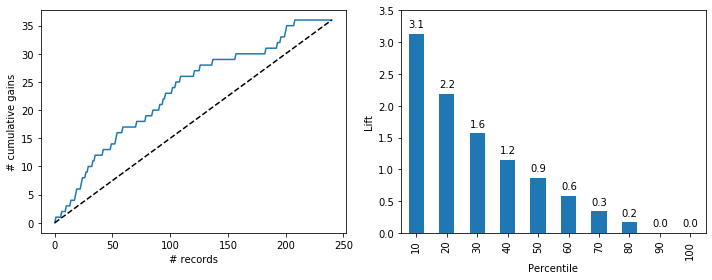

In [137]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

In [ ]:
# So, we used this model for finding the profits as per confusion matrix and gains for cluster 1 (106 people)
# Our confusion matrix says for 27 samples, we get 9 people as true positive, so willing to take promotion and 18 will reject.
# Total clients=106
#27 sample=27*5(cost)=135
#9 accept promo
#18 reject promo

#Since top 10% gives lift of 3 so, our random selection will only give 3 records. so profit will be 3*250 from random selection
#Estimated Profit= 750-135=615

#As per the model, 9 ppl accept promo so our profit will be 9*250=2250

#Estimated Profit= 2250-135=2115

In [138]:
#Running the forward selection on Cluster 1
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: SEC_2, SEC_3, SEC_4, FEH_1, FEH_2, FEH_3, MT_3, MT_4, MT_5, MT_6, MT_8, MT_9, MT_10, MT_12, MT_13, MT_14, MT_15, MT_16, MT_17, MT_19, SEX_1, SEX_2, AGE_2, AGE_3, AGE_4, EDU_1, EDU_2, EDU_3, EDU_4, EDU_5, EDU_6, EDU_7, EDU_8, EDU_9, HS_1, HS_2, HS_3, HS_4, HS_5, HS_6, HS_7, HS_8, HS_9, HS_10, HS_12, HS_15, CHILD_2, CHILD_3, CHILD_4, CHILD_5, CS_1, CS_2
Start: score=358.26, constant
Step: score=341.80, add SEC_4
Step: score=329.07, add SEC_3
Step: score=316.49, add SEC_2
Step: score=310.03, add CHILD_5
Step: score=308.47, add HS_2
Step: score=307.31, add MT_16
Step: score=306.38, add MT_10
Step: score=306.38, add None
['SEC_4', 'SEC_3', 'SEC_2', 'CHILD_5', 'HS_2', 'MT_16', 'MT_10']


In [139]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: SEC_2, SEC_3, SEC_4, FEH_1, FEH_2, FEH_3, MT_3, MT_4, MT_5, MT_6, MT_8, MT_9, MT_10, MT_12, MT_13, MT_14, MT_15, MT_16, MT_17, MT_19, SEX_1, SEX_2, AGE_2, AGE_3, AGE_4, EDU_1, EDU_2, EDU_3, EDU_4, EDU_5, EDU_6, EDU_7, EDU_8, EDU_9, HS_1, HS_2, HS_3, HS_4, HS_5, HS_6, HS_7, HS_8, HS_9, HS_10, HS_12, HS_15, CHILD_2, CHILD_3, CHILD_4, CHILD_5, CS_1, CS_2
Start: score=358.26, constant
Step: score=341.80, add SEC_4
Step: score=329.07, add SEC_3
Step: score=316.49, add SEC_2
Step: score=310.03, add CHILD_5
Step: score=308.47, add HS_2
Step: score=307.31, add MT_16
Step: score=306.38, add MT_10
Step: score=306.38, unchanged None
['SEC_4', 'SEC_3', 'SEC_2', 'CHILD_5', 'HS_2', 'MT_16', 'MT_10']


In [140]:
#using the stepwise variables
soap_df7=soap_df6[['SEC_4', 'SEC_3', 'SEC_2', 'CHILD_5', 'HS_2', 'MT_16', 'MT_10','value_conscious']]
soap_df7

,SEC_4,SEC_3,SEC_2,CHILD_5,HS_2,MT_16,MT_10,value_conscious
0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0
3,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
595,0,0,1,0,0,0,1,0
596,0,1,0,0,0,0,1,1
597,0,1,0,0,0,0,0,0
598,0,0,1,0,1,0,0,0


In [141]:
soap_df7.loc[soap_df7['value_conscious']==1]

,SEC_4,SEC_3,SEC_2,CHILD_5,HS_2,MT_16,MT_10,value_conscious
9,0,0,0,0,0,0,0,1
19,0,1,0,1,0,0,0,1
75,0,0,0,0,0,0,1,1
83,1,0,0,0,1,0,0,1
88,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
572,0,0,0,0,1,0,0,1
577,0,1,0,0,0,0,1,1
578,0,0,0,0,0,0,1,1
581,0,0,0,0,1,0,1,1


In [142]:
#Run logistic regression on demographics based on value_conscious for this case, we chose cluster 1 
y1 = soap_df7['value_conscious']
X1 = soap_df7.drop(columns=['value_conscious'])

# partition data
train_X1, valid_X1, train_y1, valid_y1 = train_test_split(X1, y1, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X1, train_y1)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X1.columns).transpose())
print()
print('AIC', AIC_score(valid_y1, logit_reg.predict(valid_X1), df = len(train_X1.columns) + 1))

intercept  -0.9451344041727711
          SEC_4     SEC_3     SEC_2   CHILD_5      HS_2     MT_16     MT_10
coeff -3.049112 -1.592714 -1.023246  1.428376  0.977249  1.753995  0.551762

AIC 262.99194940728006


In [143]:
logit_reg_pred = logit_reg.predict(valid_X1)
logit_reg_proba = logit_reg.predict_proba(valid_X1)
logit_result = pd.DataFrame({'actual': valid_y1, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })


In [144]:
classificationSummary(train_y1, logit_reg.predict(train_X1))
classificationSummary(valid_y1, logit_reg.predict(valid_X1))

Confusion Matrix (Accuracy 0.8278)

       Prediction
Actual   0   1
     0 280  10
     1  52  18
Confusion Matrix (Accuracy 0.8375)

       Prediction
Actual   0   1
     0 198   6
     1  33   3


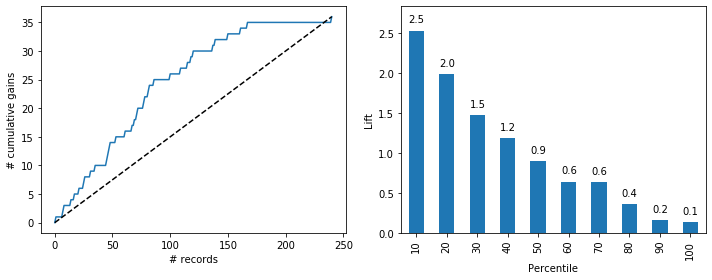

In [145]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

In [146]:
#Creating a copy of dataset for modeling purposes for cluster 4
soap_df8=soap_df[['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD','CS']]
soap_df8
#Creating dummies
soap_df8 = pd.get_dummies(soap_df8,columns=['SEC','FEH','MT','SEX','AGE','EDU','HS','CHILD','CS'], prefix_sep='_',drop_first=True)
soap_df8.columns

Index(['SEC_2', 'SEC_3', 'SEC_4', 'FEH_1', 'FEH_2', 'FEH_3', 'MT_3', 'MT_4',
       'MT_5', 'MT_6', 'MT_8', 'MT_9', 'MT_10', 'MT_12', 'MT_13', 'MT_14',
       'MT_15', 'MT_16', 'MT_17', 'MT_19', 'SEX_1', 'SEX_2', 'AGE_2', 'AGE_3',
       'AGE_4', 'EDU_1', 'EDU_2', 'EDU_3', 'EDU_4', 'EDU_5', 'EDU_6', 'EDU_7',
       'EDU_8', 'EDU_9', 'HS_1', 'HS_2', 'HS_3', 'HS_4', 'HS_5', 'HS_6',
       'HS_7', 'HS_8', 'HS_9', 'HS_10', 'HS_12', 'HS_15', 'CHILD_2', 'CHILD_3',
       'CHILD_4', 'CHILD_5', 'CS_1', 'CS_2'],
      dtype='object')

In [147]:
#Providing the 0 and 1 value to value_conscious variable based on cluster 4
value_conscious=[]
for i in range(600):
    if cluster[i]==3:
        value_conscious.append(1)
    else:
        value_conscious.append(0)
value_conscious

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,


In [148]:
value_conscious

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,


In [149]:
#Aligning the cluster with original dataset.
soap_df8['value_conscious']=value_conscious
soap_df8

,SEC_2,SEC_3,SEC_4,FEH_1,FEH_2,FEH_3,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_1,SEX_2,AGE_2,AGE_3,AGE_4,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_1,CS_2,value_conscious
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
596,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
597,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
598,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [150]:
soap_df8.loc[soap_df8['value_conscious']==1]

,SEC_2,SEC_3,SEC_4,FEH_1,FEH_2,FEH_3,MT_3,MT_4,MT_5,MT_6,MT_8,MT_9,MT_10,MT_12,MT_13,MT_14,MT_15,MT_16,MT_17,MT_19,SEX_1,SEX_2,AGE_2,AGE_3,AGE_4,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,EDU_7,EDU_8,EDU_9,HS_1,HS_2,HS_3,HS_4,HS_5,HS_6,HS_7,HS_8,HS_9,HS_10,HS_12,HS_15,CHILD_2,CHILD_3,CHILD_4,CHILD_5,CS_1,CS_2,value_conscious
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
21,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
22,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1
500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
531,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
536,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [151]:
#Run logistic regression on demographics based on value_conscious for this case, we chose cluster 4 
y2 = soap_df8['value_conscious']
X2 = soap_df8.drop(columns=['value_conscious'])

# partition data
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X2, y2, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X2, train_y2)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X2.columns).transpose())
print()
print('AIC', AIC_score(valid_y2, logit_reg.predict(valid_X2), df = len(train_X2.columns) + 1))


intercept  -8.821256957427408
          SEC_2     SEC_3     SEC_4     FEH_1     FEH_2     FEH_3      MT_3  \
coeff  1.290772  1.920273  2.995993 -5.115328 -4.712855 -4.282805 -3.222713   

           MT_4      MT_5      MT_6      MT_8      MT_9     MT_10     MT_12  \
coeff  6.137255  5.880578 -3.426932 -5.804045 -4.411978  5.482708 -3.796488   

          MT_13     MT_14     MT_15     MT_16     MT_17    MT_19      SEX_1  \
coeff -4.265937 -0.582388 -2.168837 -5.393538  3.788396 -2.32707 -12.094242   

          SEX_2     AGE_2     AGE_3     AGE_4     EDU_1     EDU_2     EDU_3  \
coeff -2.134562  0.960352  0.293956  0.044748  4.727561  4.386424  4.143052   

          EDU_4    EDU_5     EDU_6    EDU_7     EDU_8  EDU_9      HS_1  \
coeff  3.548989  3.16485 -7.421871  4.70459 -5.498029    0.0 -7.499425   

           HS_2      HS_3      HS_4      HS_5      HS_6     HS_7      HS_8  \
coeff -0.037387  0.386815  0.082566  1.434564  0.480476  1.74093  0.867099   

           HS_9     HS_10   

In [152]:
logit_reg_pred = logit_reg.predict(valid_X2)
logit_reg_proba = logit_reg.predict_proba(valid_X2)
logit_result = pd.DataFrame({'actual': valid_y2, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

In [153]:
classificationSummary(train_y2, logit_reg.predict(train_X2))
classificationSummary(valid_y2, logit_reg.predict(valid_X2))

Confusion Matrix (Accuracy 0.8917)

       Prediction
Actual   0   1
     0 312   7
     1  32   9
Confusion Matrix (Accuracy 0.8750)

       Prediction
Actual   0   1
     0 204   7
     1  23   6


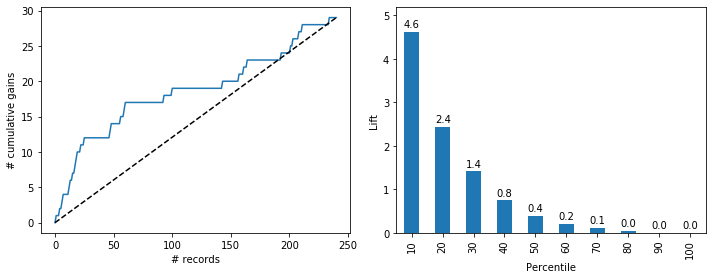

In [154]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

In [155]:
#using Forward selection on Cluster 4
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X2[variables], train_y2)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y2, [train_y2.mean()] * len(train_y2), model, df=1)
    return AIC_score(train_y2, model.predict(train_X2[variables]), model)

best_model, best_variables = forward_selection(train_X2.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: SEC_2, SEC_3, SEC_4, FEH_1, FEH_2, FEH_3, MT_3, MT_4, MT_5, MT_6, MT_8, MT_9, MT_10, MT_12, MT_13, MT_14, MT_15, MT_16, MT_17, MT_19, SEX_1, SEX_2, AGE_2, AGE_3, AGE_4, EDU_1, EDU_2, EDU_3, EDU_4, EDU_5, EDU_6, EDU_7, EDU_8, EDU_9, HS_1, HS_2, HS_3, HS_4, HS_5, HS_6, HS_7, HS_8, HS_9, HS_10, HS_12, HS_15, CHILD_2, CHILD_3, CHILD_4, CHILD_5, CS_1, CS_2
Start: score=200.00, constant
Step: score=164.27, add SEC_4
Step: score=160.00, add CHILD_5
Step: score=157.13, add EDU_1
Step: score=155.95, add HS_5
Step: score=155.73, add MT_17
Step: score=155.29, add SEC_3
Step: score=155.29, add None
['SEC_4', 'CHILD_5', 'EDU_1', 'HS_5', 'MT_17', 'SEC_3']


In [156]:
best_model, best_variables = stepwise_selection(train_X2.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: SEC_2, SEC_3, SEC_4, FEH_1, FEH_2, FEH_3, MT_3, MT_4, MT_5, MT_6, MT_8, MT_9, MT_10, MT_12, MT_13, MT_14, MT_15, MT_16, MT_17, MT_19, SEX_1, SEX_2, AGE_2, AGE_3, AGE_4, EDU_1, EDU_2, EDU_3, EDU_4, EDU_5, EDU_6, EDU_7, EDU_8, EDU_9, HS_1, HS_2, HS_3, HS_4, HS_5, HS_6, HS_7, HS_8, HS_9, HS_10, HS_12, HS_15, CHILD_2, CHILD_3, CHILD_4, CHILD_5, CS_1, CS_2
Start: score=200.00, constant
Step: score=164.27, add SEC_4
Step: score=160.00, add CHILD_5
Step: score=157.13, add EDU_1
Step: score=155.95, add HS_5
Step: score=155.73, add MT_17
Step: score=155.29, add SEC_3
Step: score=155.29, unchanged None
['SEC_4', 'CHILD_5', 'EDU_1', 'HS_5', 'MT_17', 'SEC_3']


In [157]:
#Creating a copy of dataset for modeling purposes.
soap_df9=soap_df8[['SEC_4', 'CHILD_5', 'EDU_1', 'HS_5', 'MT_17', 'SEC_3','value_conscious']]
soap_df9

,SEC_4,CHILD_5,EDU_1,HS_5,MT_17,SEC_3,value_conscious
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
595,0,0,0,1,0,0,0
596,0,0,0,0,0,1,0
597,0,0,0,0,1,1,0
598,0,0,0,0,0,0,0


In [158]:
soap_df9.loc[soap_df9['value_conscious']==1]

,SEC_4,CHILD_5,EDU_1,HS_5,MT_17,SEC_3,value_conscious
3,1,1,0,0,0,0,1
7,1,0,0,1,0,0,1
20,1,1,0,0,0,0,1
21,0,0,0,1,1,0,1
22,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
374,0,0,0,1,0,0,1
500,0,1,0,0,0,1,1
531,0,0,0,0,0,0,1
536,0,1,0,0,0,1,1


In [159]:
#Run logistic regression on demographics based on value_conscious for this case, we chose cluster 1 
y3 = soap_df9['value_conscious']
X3 = soap_df9.drop(columns=['value_conscious'])

# partition data
train_X3, valid_X3, train_y3, valid_y3 = train_test_split(X3, y3, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X3, train_y3)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X3.columns).transpose())
print()
print('AIC', AIC_score(valid_y3, logit_reg.predict(valid_X3), df = len(train_X3.columns) + 1))


intercept  -3.799291332992371
          SEC_4   CHILD_5     EDU_1      HS_5    MT_17     SEC_3
coeff  2.393392  1.558465  1.003126  0.801237 -1.26909  0.956981

AIC 181.4662367782139


In [160]:
logit_reg_pred = logit_reg.predict(valid_X3)
logit_reg_proba = logit_reg.predict_proba(valid_X3)
logit_result = pd.DataFrame({'actual': valid_y3, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

In [161]:
classificationSummary(train_y3, logit_reg.predict(train_X3))
classificationSummary(valid_y3, logit_reg.predict(valid_X3))

Confusion Matrix (Accuracy 0.8944)

       Prediction
Actual   0   1
     0 314   5
     1  33   8
Confusion Matrix (Accuracy 0.8833)

       Prediction
Actual   0   1
     0 207   4
     1  24   5


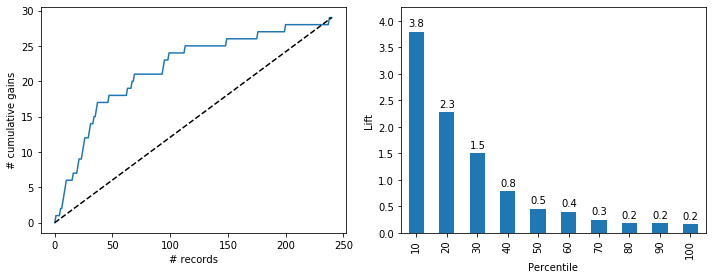

In [162]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

In [ ]:
# So, we used this model for finding the profits as per confusion matrix and gains/decile for cluster 4 (70 people)
#Total clients=70
#9 sample= 9*5(cost)=45
#5 accept promo
#4 reject promo

#Since top 10% gives lift of 4 so, our random selection will only give 1 record. so profit will be 1*250 from random selection
#Estimated Profit= 250-45=205

#As per the model, 5 people accept promo so our profit will be 5*250=1250

#Estimated Profit= 1250-45=1205